# Project: Wine quality classification

# About the datases:

link to hte dataset at Kaggle:
https://www.kaggle.com/danielpanizzo/wine-quality

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# White wines: STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv("wineQualityWhites.csv", index_col=0)

Learning the dataset and making feature engineering

In [3]:
# showing first five rows of the dateset
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# showing the column names
list(df.columns)

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1 to 4898
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [6]:
# showing statistical data of the dataset
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

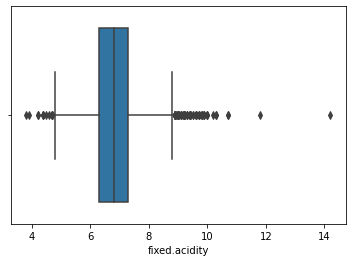

In [7]:
# plotting fixed.acidity variable
ax = sns.boxplot(x=df["fixed.acidity"]);

In [8]:
# finding outliers
df.loc[df["fixed.acidity"] > 11]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1527,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.9920,3.15,0.54,11.1,6
2051,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,9.7,3


In [9]:
# deleting the outliers
df = df.drop(df.loc[df["fixed.acidity"] > 11].index)

In [10]:
# printing skewness and kurtosis
skewness = df["fixed.acidity"].skew()
kurtosis = df["fixed.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.50, kurtosis is 0.94


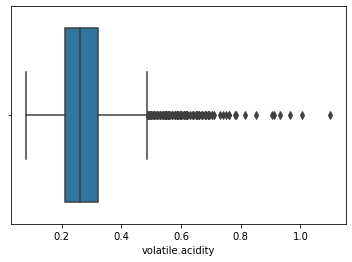

In [11]:
# plotting volatile.acidity variable
ax = sns.boxplot(x=df["volatile.acidity"]);

In [12]:
# finding outliers
df.loc[df["volatile.acidity"] > 1.05]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
4040,6.1,1.1,0.16,4.4,0.033,8.0,109.0,0.99058,3.35,0.47,12.4,4


In [13]:
# deleting the outliers
df = df.drop(df.loc[df["volatile.acidity"] > 1.05].index)

In [14]:
# printing skewness and kurtosis
skewness = df["volatile.acidity"].skew()
kurtosis = df["volatile.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.50, kurtosis is 4.39


In [15]:
# volatile.acidity distribution is highly skewed
# trying log transformation to improve the skewness
log_volatile_acidity_skewness = np.log(df["volatile.acidity"]).skew()
log_volatile_acidity_skewness

0.12691854080365297

In [16]:
# creating log(volatile.acidity) column
df["log(volatile.acidity)"] = np.log(df['volatile.acidity'])

In [17]:
# removing volatile.acidity column
df.drop(["volatile.acidity"], axis=1, inplace=True)

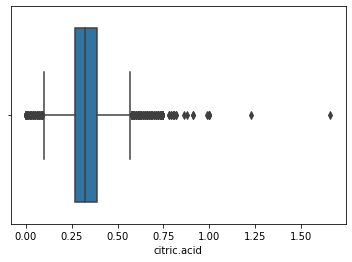

In [18]:
# plotting citric.acid variable
ax = sns.boxplot(x=df["citric.acid"]);

In [19]:
# finding outliers
df.loc[df["citric.acid"] > 1.1]

,fixed.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity)
746,7.4,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,-1.609438
3153,7.6,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,-1.386294


In [20]:
# deleting the outliers
df = df.drop(df.loc[df["citric.acid"] > 1.1].index)

In [21]:
# printing skewness and kurtosis
skewness = df["citric.acid"].skew()
kurtosis = df["citric.acid"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.00, kurtosis is 3.06


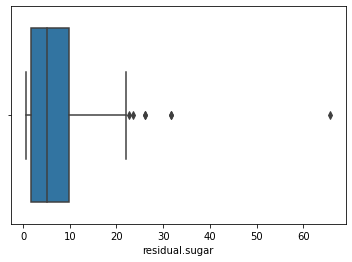

In [22]:
# plotting residual.sugar variable
ax = sns.boxplot(x=df["residual.sugar"]);

In [23]:
# finding outliers
df.loc[df["residual.sugar"] > 30]

,fixed.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity)
1654,7.9,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,-1.108663
1664,7.9,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,-1.108663
2782,7.8,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,-0.035627


In [24]:
# deleting the outliers
df = df.drop(df.loc[df["residual.sugar"] > 30].index)

In [25]:
# printing skewness and kurtosis
skewness = df["residual.sugar"].skew()
kurtosis = df["residual.sugar"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.75, kurtosis is -0.43


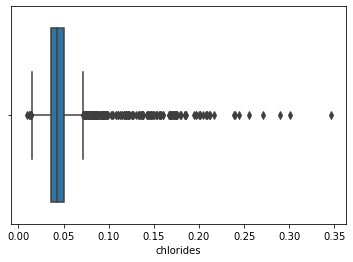

In [26]:
# plotting chlorides variable
ax = sns.boxplot(x=df["chlorides"]);

In [27]:
# finding outliers
df.loc[df["chlorides"] > 0.22]

,fixed.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity)
485,6.2,0.30,6.6,0.346,79.0,200.0,0.99540,3.29,0.58,9.6,5,-0.994252
684,6.4,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4,5,-1.309333
688,6.8,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,4,-0.400478
1035,7.9,0.46,10.6,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,-0.446287
1218,8.0,0.38,12.1,0.301,24.0,220.0,0.99930,2.94,0.48,9.2,5,-0.494296
1639,7.6,0.49,13.0,0.239,42.0,220.0,0.99880,2.96,0.51,9.2,5,-0.755023
1866,7.6,0.44,8.3,0.255,28.0,142.0,0.99580,3.12,0.43,10.2,6,-1.021651
4474,7.1,0.20,1.6,0.271,24.0,140.0,0.99356,3.11,0.63,9.8,5,-1.021651


In [28]:
# deleting the outliers
df = df.drop(df.loc[df["chlorides"] > 0.22].index)

In [29]:
# printing skewness and kurtosis
skewness = df["chlorides"].skew()
kurtosis = df["chlorides"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 4.16, kurtosis is 24.64


In [30]:
# chlorides distribution is highly skewed
# trying log transformation to improve the skewness
log_chlorides_skewness = np.log(df["chlorides"]).skew()
log_chlorides_skewness

0.9468475159162679

In [31]:
# creating log(chlorides) column
df["log(chlorides)"] = np.log(df['chlorides'])

In [32]:
# removing chlorides column
df.drop(["chlorides"], axis=1, inplace=True)

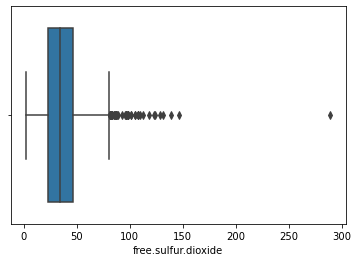

In [33]:
# plotting free.sulfur.dioxide variable
ax = sns.boxplot(x=df["free.sulfur.dioxide"]);

In [34]:
# finding outliers
df.loc[df["free.sulfur.dioxide"] > 200]

,fixed.acidity,citric.acid,residual.sugar,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity),log(chlorides)
4746,6.1,0.25,2.9,289.0,440.0,0.99314,3.44,0.64,10.5,3,-1.347074,-3.057608


In [35]:
# deleting the outliers
df = df.drop(df.loc[df["free.sulfur.dioxide"] > 200].index)

In [36]:
# printing skewness and kurtosis
skewness = df["free.sulfur.dioxide"].skew()
kurtosis = df["free.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.79, kurtosis is 1.78


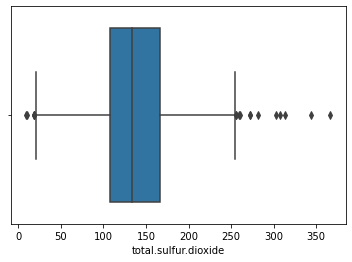

In [37]:
# plotting total.sulfur.dioxide variable
ax = sns.boxplot(x=df["total.sulfur.dioxide"]);

In [38]:
# finding outliers
df.loc[df["total.sulfur.dioxide"] > 320]

,fixed.acidity,citric.acid,residual.sugar,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity),log(chlorides)
1418,8.6,0.35,15.55,35.5,366.5,1.0001,3.04,0.63,11.0,3,-0.597837,-2.864704
2128,9.1,0.38,1.70,50.5,344.0,0.9958,3.10,0.70,9.5,5,-1.108663,-2.780621


In [39]:
# deleting the outliers
df = df.drop(df.loc[df["total.sulfur.dioxide"] > 320].index)

In [40]:
# printing skewness and kurtosis
skewness = df["total.sulfur.dioxide"].skew()
kurtosis = df["total.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.28, kurtosis is -0.12


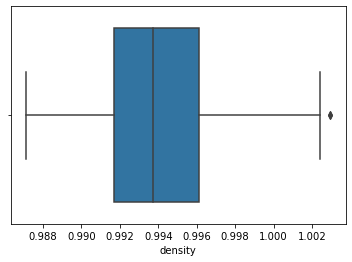

In [41]:
# plotting density variable
ax = sns.boxplot(x=df["density"]);

In [42]:
# printing skewness and kurtosis
skewness = df["density"].skew()
kurtosis = df["density"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.26, kurtosis is -0.74


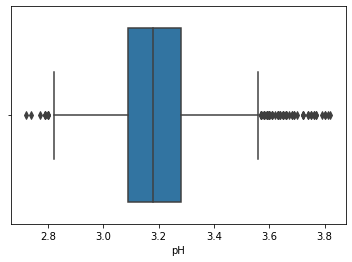

In [43]:
# plotting pH variable
ax = sns.boxplot(x=df["pH"]);

In [44]:
# printing skewness and kurtosis
skewness = df["pH"].skew()
kurtosis = df["pH"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.46, kurtosis is 0.54


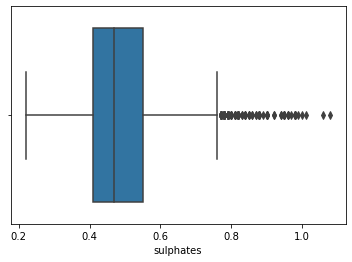

In [45]:
# plotting sulphates variable
ax = sns.boxplot(x=df["sulphates"]);

In [46]:
# finding outliers
df.loc[df["sulphates"] > 1.05]

,fixed.acidity,citric.acid,residual.sugar,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,log(volatile.acidity),log(chlorides)
2442,7.2,0.28,1.6,13.0,168.0,0.99203,3.17,1.06,11.50,6,-1.609438,-3.575551
4887,6.2,0.28,5.7,45.0,121.0,0.99168,3.21,1.08,12.15,7,-1.560648,-3.575551


In [47]:
# deleting the outliers
df = df.drop(df.loc[df["sulphates"] > 1.05].index)

In [48]:
# printing skewness and kurtosis
skewness = df["sulphates"].skew()
kurtosis = df["sulphates"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.95, kurtosis is 1.44


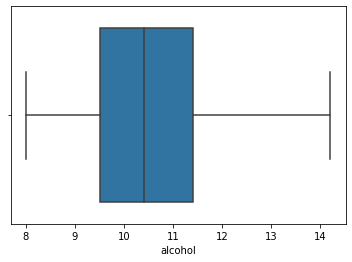

In [49]:
# plotting alcohol variable
ax = sns.boxplot(x=df["alcohol"]);

In [50]:
# printing skewness and kurtosis
skewness = df["alcohol"].skew()
kurtosis = df["alcohol"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.49, kurtosis is -0.70


C:\Users\artem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


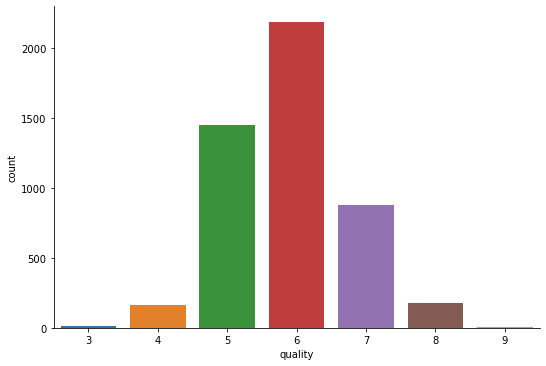

In [51]:
# plotting quality variable
ax = sns.catplot("quality", data=df, kind='count', aspect=1.5);

In [52]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

6    2190
5    1451
7     879
8     175
4     161
3      16
9       5
Name: quality, dtype: int64

In [53]:
# deleting the outliers
df = df.drop(df.loc[df["quality"] == 3].index)
df = df.drop(df.loc[df["quality"] == 9].index)

In [54]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

6    2190
5    1451
7     879
8     175
4     161
Name: quality, dtype: int64

In [55]:
# reordering the dataframe columns in original order
df = df[['fixed.acidity',
 'log(volatile.acidity)',
 'citric.acid',
 'residual.sugar',
 'log(chlorides)',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']]

In [56]:
# calculating a correlation matrix
corr_matrix = df.corr()

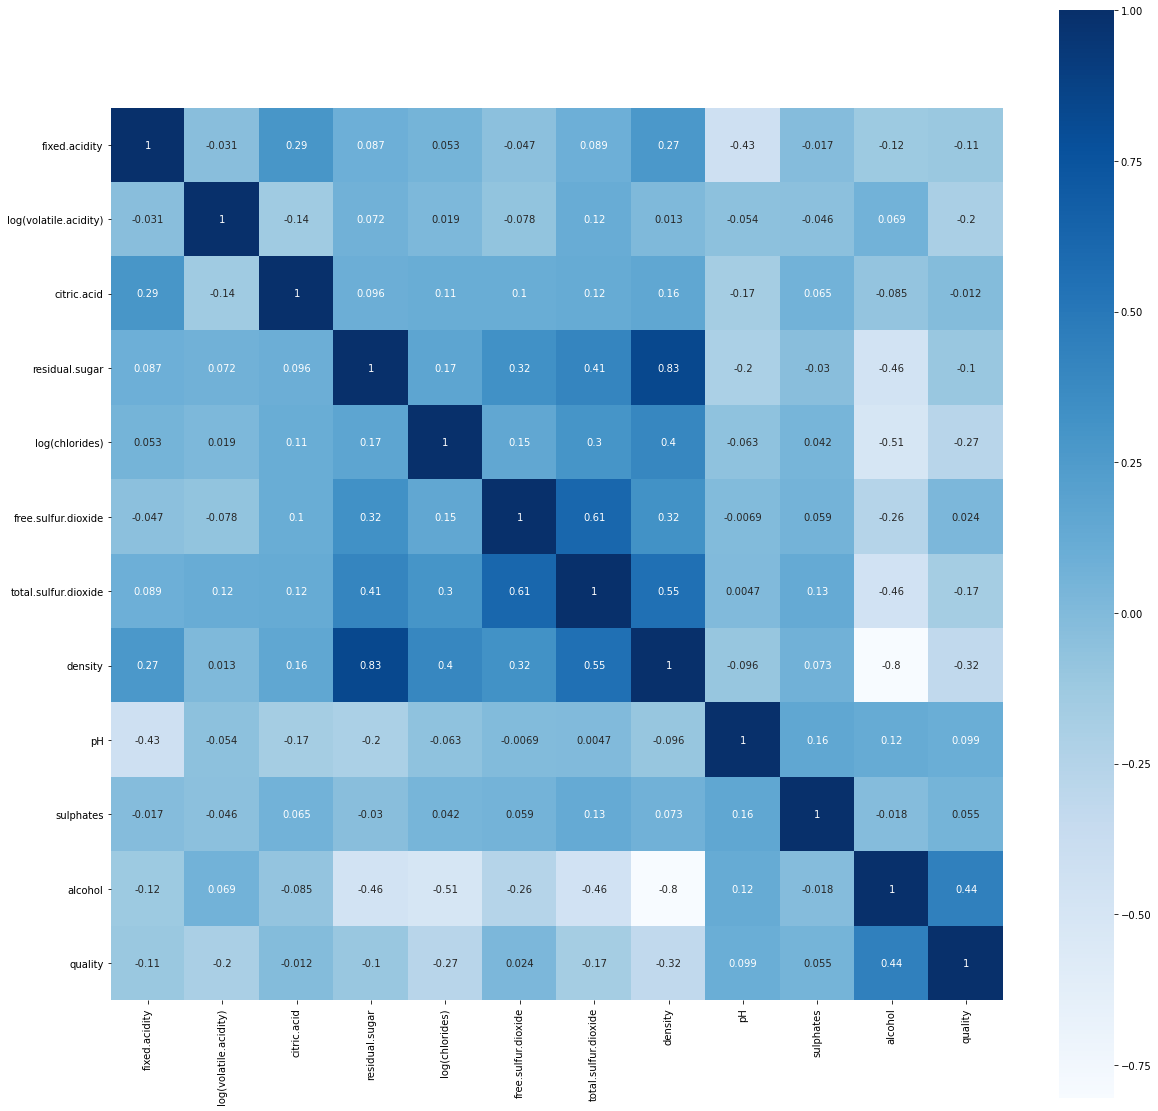

In [57]:
# drawing a heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='Blues')
plt.show()

Discussion: density is correlated with residual.sugar and alcohol.

Discussion: variables citric.acid and free.sulfur.dioxide have futile influence on the quality

In [58]:
# removing citric.acid column
df.drop(["citric.acid"], axis=1, inplace=True)

In [59]:
# removing  free.sulfur.dioxide column
df.drop(["free.sulfur.dioxide"], axis=1, inplace=True)

In [60]:
df.head()

,fixed.acidity,log(volatile.acidity),residual.sugar,log(chlorides),total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.0,-1.309333,20.7,-3.101093,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,-1.203973,1.6,-3.015935,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,-1.272966,6.9,-2.995732,97.0,0.9951,3.26,0.44,10.1,6
4,7.2,-1.469676,8.5,-2.847312,186.0,0.9956,3.19,0.40,9.9,6
5,7.2,-1.469676,8.5,-2.847312,186.0,0.9956,3.19,0.40,9.9,6


# White wines: STEP 2: Choosing best performing machine learning model

In [61]:
# defining variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [62]:
# splitting the dataset to a train and a test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [64]:
# training the  model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [65]:
# predicting y_test
y_pred = classifier.predict(X_test)

In [66]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  1  17   8   0   0]
 [  0 152 113   3   0]
 [  1  99 322  49   0]
 [  0   5 132  43   0]
 [  0   0  16  11   0]]


0.5329218106995884

In [67]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 54.17 %
Standard Deviation: 1.65 %


# K Nearest Neighbors

In [68]:
# training the  model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
# predicting y_test
y_pred = classifier.predict(X_test)

In [70]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  2  17   6   1   0]
 [  4 177  81   6   0]
 [  7 128 278  50   8]
 [  0  17  85  75   3]
 [  0   3  12   9   3]]


0.5504115226337448

In [71]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 54.51 %
Standard Deviation: 1.89 %


# Support Vector Machine

In [72]:
# training the SVM model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [73]:
# predicting y_valid
y_pred = classifier.predict(X_test)

In [74]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0  18   8   0   0]
 [  0 151 117   0   0]
 [  0 103 368   0   0]
 [  0   5 175   0   0]
 [  0   0  27   0   0]]


0.5339506172839507

In [75]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 52.11 %
Standard Deviation: 1.04 %


# Kernel SVM

In [76]:
# training the  model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [77]:
# predicting y_valid
y_pred = classifier.predict(X_test)

In [78]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0  16  10   0   0]
 [  0 158 109   1   0]
 [  0 100 348  23   0]
 [  0   4 136  40   0]
 [  0   0  19   8   0]]


0.5617283950617284

In [79]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.51 %
Standard Deviation: 1.99 %


# Naive Bayes

In [80]:
# training the  model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [81]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [82]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  1  15   8   2   0]
 [  4 174  78  12   0]
 [  5 140 209 117   0]
 [  0  20  62  98   0]
 [  0   3   5  18   1]]


0.49691358024691357

In [83]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 48.33 %
Standard Deviation: 1.96 %


# Decision Tree Classification

In [84]:
# training the  model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [85]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [86]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  9  13   4   0   0]
 [ 16 168  73   9   2]
 [ 23  96 273  65  14]
 [  2  16  46 108   8]
 [  1   1   3  12  10]]


0.5843621399176955

In [87]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 59.68 %
Standard Deviation: 1.85 %


# Random Forest Classification

In [88]:
# training the  model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

In [89]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [90]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  6  10   9   1   0]
 [  5 192  65   6   0]
 [  2  90 346  31   2]
 [  0   6  73  99   2]
 [  0   0  13   5   9]]


0.6707818930041153

In [91]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.81 %
Standard Deviation: 1.60 %


# XG Boost

In [92]:
# training the  model on the training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[14:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [94]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  7  17   2   0   0]
 [  7 181  76   3   1]
 [  1  78 345  44   3]
 [  0   5  77  97   1]
 [  0   0  10   6  11]]


0.6594650205761317

In [95]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[14:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\artem\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 65.27 %
Standard Deviation: 2.65 %


# Cat Boost

In [96]:
# training the  model on the training set
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.084796
0:	learn: 1.5374314	total: 160ms	remaining: 2m 39s
1:	learn: 1.4765502	total: 173ms	remaining: 1m 26s
2:	learn: 1.4262624	total: 188ms	remaining: 1m 2s
3:	learn: 1.3840725	total: 199ms	remaining: 49.6s
4:	learn: 1.3473292	total: 211ms	remaining: 42s
5:	learn: 1.3150320	total: 222ms	remaining: 36.8s
6:	learn: 1.2878186	total: 232ms	remaining: 32.9s
7:	learn: 1.2620319	total: 242ms	remaining: 30s
8:	learn: 1.2380114	total: 250ms	remaining: 27.6s
9:	learn: 1.2162166	total: 258ms	remaining: 25.6s
10:	learn: 1.1993975	total: 267ms	remaining: 24s
11:	learn: 1.1819411	total: 275ms	remaining: 22.6s
12:	learn: 1.1664256	total: 282ms	remaining: 21.4s
13:	learn: 1.1526530	total: 290ms	remaining: 20.4s
14:	learn: 1.1404545	total: 297ms	remaining: 19.5s
15:	learn: 1.1290088	total: 304ms	remaining: 18.7s
16:	learn: 1.1191849	total: 310ms	remaining: 17.9s
17:	learn: 1.1098647	total: 318ms	remaining: 17.3s
18:	learn: 1.1026300	total: 324ms	remaining: 16.7s
19:	learn: 1.09

188:	learn: 0.7747698	total: 1.25s	remaining: 5.37s
189:	learn: 0.7736472	total: 1.26s	remaining: 5.36s
190:	learn: 0.7722648	total: 1.26s	remaining: 5.34s
191:	learn: 0.7714155	total: 1.27s	remaining: 5.33s
192:	learn: 0.7705487	total: 1.27s	remaining: 5.32s
193:	learn: 0.7691719	total: 1.28s	remaining: 5.32s
194:	learn: 0.7685532	total: 1.28s	remaining: 5.3s
195:	learn: 0.7677734	total: 1.29s	remaining: 5.29s
196:	learn: 0.7661773	total: 1.3s	remaining: 5.28s
197:	learn: 0.7646629	total: 1.3s	remaining: 5.27s
198:	learn: 0.7631379	total: 1.3s	remaining: 5.26s
199:	learn: 0.7624261	total: 1.31s	remaining: 5.24s
200:	learn: 0.7606543	total: 1.31s	remaining: 5.23s
201:	learn: 0.7596871	total: 1.32s	remaining: 5.22s
202:	learn: 0.7586166	total: 1.32s	remaining: 5.2s
203:	learn: 0.7579301	total: 1.33s	remaining: 5.19s
204:	learn: 0.7572072	total: 1.33s	remaining: 5.18s
205:	learn: 0.7563963	total: 1.34s	remaining: 5.17s
206:	learn: 0.7551426	total: 1.35s	remaining: 5.16s
207:	learn: 0.753

365:	learn: 0.6153685	total: 2.15s	remaining: 3.73s
366:	learn: 0.6144164	total: 2.16s	remaining: 3.72s
367:	learn: 0.6138465	total: 2.16s	remaining: 3.71s
368:	learn: 0.6130252	total: 2.17s	remaining: 3.71s
369:	learn: 0.6126183	total: 2.17s	remaining: 3.7s
370:	learn: 0.6117795	total: 2.18s	remaining: 3.69s
371:	learn: 0.6106945	total: 2.18s	remaining: 3.69s
372:	learn: 0.6102829	total: 2.19s	remaining: 3.68s
373:	learn: 0.6097237	total: 2.19s	remaining: 3.67s
374:	learn: 0.6085237	total: 2.2s	remaining: 3.67s
375:	learn: 0.6080920	total: 2.21s	remaining: 3.66s
376:	learn: 0.6075901	total: 2.21s	remaining: 3.65s
377:	learn: 0.6066503	total: 2.21s	remaining: 3.65s
378:	learn: 0.6056685	total: 2.22s	remaining: 3.64s
379:	learn: 0.6044426	total: 2.23s	remaining: 3.63s
380:	learn: 0.6039000	total: 2.23s	remaining: 3.62s
381:	learn: 0.6035560	total: 2.23s	remaining: 3.62s
382:	learn: 0.6022698	total: 2.24s	remaining: 3.61s
383:	learn: 0.6014310	total: 2.25s	remaining: 3.6s
384:	learn: 0.6

539:	learn: 0.5019976	total: 3.06s	remaining: 2.6s
540:	learn: 0.5015157	total: 3.06s	remaining: 2.6s
541:	learn: 0.5011390	total: 3.07s	remaining: 2.59s
542:	learn: 0.5006962	total: 3.08s	remaining: 2.59s
543:	learn: 0.5002231	total: 3.08s	remaining: 2.58s
544:	learn: 0.4999719	total: 3.08s	remaining: 2.58s
545:	learn: 0.4995548	total: 3.09s	remaining: 2.57s
546:	learn: 0.4991393	total: 3.1s	remaining: 2.56s
547:	learn: 0.4984967	total: 3.1s	remaining: 2.56s
548:	learn: 0.4979273	total: 3.11s	remaining: 2.55s
549:	learn: 0.4973942	total: 3.11s	remaining: 2.55s
550:	learn: 0.4971067	total: 3.12s	remaining: 2.54s
551:	learn: 0.4967104	total: 3.12s	remaining: 2.54s
552:	learn: 0.4961956	total: 3.13s	remaining: 2.53s
553:	learn: 0.4957557	total: 3.13s	remaining: 2.52s
554:	learn: 0.4951930	total: 3.14s	remaining: 2.52s
555:	learn: 0.4948360	total: 3.14s	remaining: 2.51s
556:	learn: 0.4942081	total: 3.15s	remaining: 2.5s
557:	learn: 0.4937148	total: 3.15s	remaining: 2.5s
558:	learn: 0.4932

711:	learn: 0.4200391	total: 3.96s	remaining: 1.6s
712:	learn: 0.4197219	total: 3.97s	remaining: 1.6s
713:	learn: 0.4194242	total: 3.98s	remaining: 1.59s
714:	learn: 0.4186410	total: 3.98s	remaining: 1.59s
715:	learn: 0.4183163	total: 3.99s	remaining: 1.58s
716:	learn: 0.4179228	total: 3.99s	remaining: 1.58s
717:	learn: 0.4176703	total: 4s	remaining: 1.57s
718:	learn: 0.4173329	total: 4s	remaining: 1.56s
719:	learn: 0.4168531	total: 4.01s	remaining: 1.56s
720:	learn: 0.4164290	total: 4.02s	remaining: 1.55s
721:	learn: 0.4161098	total: 4.02s	remaining: 1.55s
722:	learn: 0.4158339	total: 4.03s	remaining: 1.54s
723:	learn: 0.4151841	total: 4.03s	remaining: 1.54s
724:	learn: 0.4150142	total: 4.04s	remaining: 1.53s
725:	learn: 0.4145061	total: 4.04s	remaining: 1.52s
726:	learn: 0.4139899	total: 4.05s	remaining: 1.52s
727:	learn: 0.4137278	total: 4.05s	remaining: 1.51s
728:	learn: 0.4134934	total: 4.06s	remaining: 1.51s
729:	learn: 0.4128982	total: 4.06s	remaining: 1.5s
730:	learn: 0.4126969

885:	learn: 0.3548784	total: 4.87s	remaining: 627ms
886:	learn: 0.3547074	total: 4.88s	remaining: 621ms
887:	learn: 0.3545095	total: 4.88s	remaining: 616ms
888:	learn: 0.3540902	total: 4.89s	remaining: 610ms
889:	learn: 0.3535981	total: 4.89s	remaining: 605ms
890:	learn: 0.3532407	total: 4.9s	remaining: 599ms
891:	learn: 0.3527791	total: 4.9s	remaining: 594ms
892:	learn: 0.3525735	total: 4.91s	remaining: 588ms
893:	learn: 0.3525600	total: 4.91s	remaining: 582ms
894:	learn: 0.3521856	total: 4.92s	remaining: 577ms
895:	learn: 0.3519778	total: 4.92s	remaining: 571ms
896:	learn: 0.3514180	total: 4.93s	remaining: 566ms
897:	learn: 0.3512980	total: 4.93s	remaining: 560ms
898:	learn: 0.3511664	total: 4.94s	remaining: 555ms
899:	learn: 0.3507303	total: 4.94s	remaining: 549ms
900:	learn: 0.3503934	total: 4.95s	remaining: 544ms
901:	learn: 0.3501339	total: 4.95s	remaining: 538ms
902:	learn: 0.3497804	total: 4.96s	remaining: 533ms
903:	learn: 0.3493696	total: 4.96s	remaining: 527ms
904:	learn: 0.

In [97]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [98]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  4  17   5   0   0]
 [  4 182  80   2   0]
 [  3  82 342  43   1]
 [  0   6  76  97   1]
 [  0   0   8  10   9]]


0.6522633744855967

In [99]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.084341
0:	learn: 1.5391421	total: 9.61ms	remaining: 9.6s
1:	learn: 1.4790431	total: 18.2ms	remaining: 9.11s
2:	learn: 1.4304907	total: 28.5ms	remaining: 9.46s
3:	learn: 1.3880302	total: 37.1ms	remaining: 9.24s
4:	learn: 1.3507084	total: 46.7ms	remaining: 9.3s
5:	learn: 1.3202766	total: 54.6ms	remaining: 9.05s
6:	learn: 1.2929084	total: 62.7ms	remaining: 8.89s
7:	learn: 1.2679022	total: 68.9ms	remaining: 8.54s
8:	learn: 1.2454497	total: 76.5ms	remaining: 8.42s
9:	learn: 1.2256388	total: 82.4ms	remaining: 8.16s
10:	learn: 1.2075553	total: 89.5ms	remaining: 8.04s
11:	learn: 1.1906467	total: 95.2ms	remaining: 7.84s
12:	learn: 1.1749676	total: 100ms	remaining: 7.62s
13:	learn: 1.1616053	total: 107ms	remaining: 7.52s
14:	learn: 1.1490220	total: 112ms	remaining: 7.33s
15:	learn: 1.1376319	total: 117ms	remaining: 7.2s
16:	learn: 1.1275195	total: 123ms	remaining: 7.11s
17:	learn: 1.1172637	total: 128ms	remaining: 7s
18:	learn: 1.1085973	total: 135ms	remaining: 6.98s
19:	l

162:	learn: 0.8091542	total: 1.04s	remaining: 5.34s
163:	learn: 0.8072680	total: 1.04s	remaining: 5.32s
164:	learn: 0.8068099	total: 1.05s	remaining: 5.31s
165:	learn: 0.8052375	total: 1.05s	remaining: 5.3s
166:	learn: 0.8043513	total: 1.06s	remaining: 5.29s
167:	learn: 0.8030461	total: 1.06s	remaining: 5.28s
168:	learn: 0.8015148	total: 1.07s	remaining: 5.26s
169:	learn: 0.8002665	total: 1.08s	remaining: 5.25s
170:	learn: 0.7981078	total: 1.08s	remaining: 5.24s
171:	learn: 0.7966439	total: 1.09s	remaining: 5.24s
172:	learn: 0.7955070	total: 1.09s	remaining: 5.23s
173:	learn: 0.7941981	total: 1.1s	remaining: 5.22s
174:	learn: 0.7930521	total: 1.1s	remaining: 5.21s
175:	learn: 0.7925756	total: 1.11s	remaining: 5.2s
176:	learn: 0.7920031	total: 1.12s	remaining: 5.19s
177:	learn: 0.7907742	total: 1.12s	remaining: 5.18s
178:	learn: 0.7898798	total: 1.13s	remaining: 5.17s
179:	learn: 0.7891451	total: 1.13s	remaining: 5.16s
180:	learn: 0.7870727	total: 1.14s	remaining: 5.16s
181:	learn: 0.78

329:	learn: 0.6413804	total: 1.95s	remaining: 3.95s
330:	learn: 0.6401334	total: 1.95s	remaining: 3.94s
331:	learn: 0.6388885	total: 1.96s	remaining: 3.94s
332:	learn: 0.6377329	total: 1.96s	remaining: 3.93s
333:	learn: 0.6373689	total: 1.97s	remaining: 3.93s
334:	learn: 0.6363106	total: 1.98s	remaining: 3.92s
335:	learn: 0.6361665	total: 1.98s	remaining: 3.92s
336:	learn: 0.6351878	total: 1.99s	remaining: 3.91s
337:	learn: 0.6334586	total: 1.99s	remaining: 3.9s
338:	learn: 0.6321124	total: 2s	remaining: 3.9s
339:	learn: 0.6311798	total: 2s	remaining: 3.89s
340:	learn: 0.6298279	total: 2.01s	remaining: 3.88s
341:	learn: 0.6293834	total: 2.02s	remaining: 3.88s
342:	learn: 0.6284706	total: 2.02s	remaining: 3.87s
343:	learn: 0.6274908	total: 2.03s	remaining: 3.87s
344:	learn: 0.6270196	total: 2.03s	remaining: 3.86s
345:	learn: 0.6264948	total: 2.04s	remaining: 3.85s
346:	learn: 0.6259002	total: 2.04s	remaining: 3.85s
347:	learn: 0.6248956	total: 2.05s	remaining: 3.84s
348:	learn: 0.624406

491:	learn: 0.5251810	total: 2.85s	remaining: 2.94s
492:	learn: 0.5244920	total: 2.86s	remaining: 2.94s
493:	learn: 0.5238175	total: 2.86s	remaining: 2.93s
494:	learn: 0.5229465	total: 2.87s	remaining: 2.92s
495:	learn: 0.5223726	total: 2.87s	remaining: 2.92s
496:	learn: 0.5213635	total: 2.88s	remaining: 2.91s
497:	learn: 0.5210698	total: 2.88s	remaining: 2.91s
498:	learn: 0.5204767	total: 2.89s	remaining: 2.9s
499:	learn: 0.5201500	total: 2.9s	remaining: 2.9s
500:	learn: 0.5194973	total: 2.9s	remaining: 2.89s
501:	learn: 0.5185340	total: 2.9s	remaining: 2.88s
502:	learn: 0.5177927	total: 2.91s	remaining: 2.88s
503:	learn: 0.5172575	total: 2.92s	remaining: 2.87s
504:	learn: 0.5170360	total: 2.92s	remaining: 2.86s
505:	learn: 0.5160900	total: 2.93s	remaining: 2.86s
506:	learn: 0.5154216	total: 2.93s	remaining: 2.85s
507:	learn: 0.5149374	total: 2.94s	remaining: 2.85s
508:	learn: 0.5140248	total: 2.94s	remaining: 2.84s
509:	learn: 0.5136476	total: 2.95s	remaining: 2.83s
510:	learn: 0.513

652:	learn: 0.4385265	total: 3.76s	remaining: 2s
653:	learn: 0.4382957	total: 3.76s	remaining: 1.99s
654:	learn: 0.4380329	total: 3.77s	remaining: 1.99s
655:	learn: 0.4376146	total: 3.78s	remaining: 1.98s
656:	learn: 0.4372180	total: 3.78s	remaining: 1.98s
657:	learn: 0.4369917	total: 3.79s	remaining: 1.97s
658:	learn: 0.4365607	total: 3.79s	remaining: 1.96s
659:	learn: 0.4362684	total: 3.8s	remaining: 1.96s
660:	learn: 0.4358557	total: 3.81s	remaining: 1.95s
661:	learn: 0.4352187	total: 3.81s	remaining: 1.95s
662:	learn: 0.4348009	total: 3.82s	remaining: 1.94s
663:	learn: 0.4340856	total: 3.82s	remaining: 1.93s
664:	learn: 0.4329686	total: 3.83s	remaining: 1.93s
665:	learn: 0.4325053	total: 3.83s	remaining: 1.92s
666:	learn: 0.4321266	total: 3.84s	remaining: 1.92s
667:	learn: 0.4315901	total: 3.84s	remaining: 1.91s
668:	learn: 0.4307890	total: 3.85s	remaining: 1.9s
669:	learn: 0.4300640	total: 3.85s	remaining: 1.9s
670:	learn: 0.4295694	total: 3.86s	remaining: 1.89s
671:	learn: 0.4290

814:	learn: 0.3716065	total: 4.67s	remaining: 1.06s
815:	learn: 0.3713135	total: 4.67s	remaining: 1.05s
816:	learn: 0.3709676	total: 4.68s	remaining: 1.05s
817:	learn: 0.3706021	total: 4.68s	remaining: 1.04s
818:	learn: 0.3701800	total: 4.69s	remaining: 1.04s
819:	learn: 0.3700193	total: 4.7s	remaining: 1.03s
820:	learn: 0.3698345	total: 4.7s	remaining: 1.02s
821:	learn: 0.3693364	total: 4.71s	remaining: 1.02s
822:	learn: 0.3684853	total: 4.71s	remaining: 1.01s
823:	learn: 0.3680680	total: 4.72s	remaining: 1.01s
824:	learn: 0.3676656	total: 4.72s	remaining: 1s
825:	learn: 0.3671830	total: 4.73s	remaining: 996ms
826:	learn: 0.3666772	total: 4.73s	remaining: 990ms
827:	learn: 0.3663150	total: 4.74s	remaining: 985ms
828:	learn: 0.3660722	total: 4.75s	remaining: 979ms
829:	learn: 0.3658979	total: 4.75s	remaining: 974ms
830:	learn: 0.3656512	total: 4.76s	remaining: 968ms
831:	learn: 0.3652337	total: 4.76s	remaining: 962ms
832:	learn: 0.3648496	total: 4.77s	remaining: 956ms
833:	learn: 0.364

975:	learn: 0.3165360	total: 5.57s	remaining: 137ms
976:	learn: 0.3162712	total: 5.57s	remaining: 131ms
977:	learn: 0.3161911	total: 5.58s	remaining: 126ms
978:	learn: 0.3159909	total: 5.58s	remaining: 120ms
979:	learn: 0.3155822	total: 5.59s	remaining: 114ms
980:	learn: 0.3152986	total: 5.59s	remaining: 108ms
981:	learn: 0.3149389	total: 5.6s	remaining: 103ms
982:	learn: 0.3147295	total: 5.61s	remaining: 97ms
983:	learn: 0.3144276	total: 5.61s	remaining: 91.2ms
984:	learn: 0.3139980	total: 5.62s	remaining: 85.5ms
985:	learn: 0.3135223	total: 5.62s	remaining: 79.8ms
986:	learn: 0.3132816	total: 5.63s	remaining: 74.1ms
987:	learn: 0.3130280	total: 5.63s	remaining: 68.4ms
988:	learn: 0.3127573	total: 5.64s	remaining: 62.7ms
989:	learn: 0.3123590	total: 5.64s	remaining: 57ms
990:	learn: 0.3120607	total: 5.65s	remaining: 51.3ms
991:	learn: 0.3117855	total: 5.66s	remaining: 45.6ms
992:	learn: 0.3115590	total: 5.66s	remaining: 39.9ms
993:	learn: 0.3114037	total: 5.67s	remaining: 34.2ms
994:	

136:	learn: 0.8381376	total: 767ms	remaining: 4.83s
137:	learn: 0.8366872	total: 773ms	remaining: 4.83s
138:	learn: 0.8353702	total: 779ms	remaining: 4.83s
139:	learn: 0.8340371	total: 784ms	remaining: 4.82s
140:	learn: 0.8319498	total: 790ms	remaining: 4.81s
141:	learn: 0.8293837	total: 796ms	remaining: 4.81s
142:	learn: 0.8273144	total: 803ms	remaining: 4.81s
143:	learn: 0.8256142	total: 808ms	remaining: 4.8s
144:	learn: 0.8242494	total: 815ms	remaining: 4.8s
145:	learn: 0.8226736	total: 820ms	remaining: 4.8s
146:	learn: 0.8217908	total: 826ms	remaining: 4.79s
147:	learn: 0.8202912	total: 831ms	remaining: 4.78s
148:	learn: 0.8179523	total: 836ms	remaining: 4.78s
149:	learn: 0.8158154	total: 841ms	remaining: 4.77s
150:	learn: 0.8144730	total: 847ms	remaining: 4.76s
151:	learn: 0.8126119	total: 852ms	remaining: 4.75s
152:	learn: 0.8113797	total: 857ms	remaining: 4.74s
153:	learn: 0.8100610	total: 862ms	remaining: 4.74s
154:	learn: 0.8092734	total: 867ms	remaining: 4.73s
155:	learn: 0.8

297:	learn: 0.6618885	total: 1.66s	remaining: 3.9s
298:	learn: 0.6616227	total: 1.66s	remaining: 3.9s
299:	learn: 0.6608733	total: 1.67s	remaining: 3.9s
300:	learn: 0.6600011	total: 1.68s	remaining: 3.89s
301:	learn: 0.6587677	total: 1.68s	remaining: 3.89s
302:	learn: 0.6581885	total: 1.69s	remaining: 3.88s
303:	learn: 0.6573587	total: 1.69s	remaining: 3.87s
304:	learn: 0.6565930	total: 1.7s	remaining: 3.87s
305:	learn: 0.6553283	total: 1.7s	remaining: 3.86s
306:	learn: 0.6543788	total: 1.71s	remaining: 3.86s
307:	learn: 0.6534523	total: 1.72s	remaining: 3.86s
308:	learn: 0.6520886	total: 1.72s	remaining: 3.85s
309:	learn: 0.6507061	total: 1.73s	remaining: 3.85s
310:	learn: 0.6496478	total: 1.73s	remaining: 3.84s
311:	learn: 0.6494541	total: 1.74s	remaining: 3.83s
312:	learn: 0.6483852	total: 1.74s	remaining: 3.83s
313:	learn: 0.6476929	total: 1.75s	remaining: 3.82s
314:	learn: 0.6467887	total: 1.75s	remaining: 3.81s
315:	learn: 0.6459836	total: 1.76s	remaining: 3.81s
316:	learn: 0.645

461:	learn: 0.5426777	total: 2.56s	remaining: 2.98s
462:	learn: 0.5420730	total: 2.57s	remaining: 2.98s
463:	learn: 0.5415682	total: 2.58s	remaining: 2.98s
464:	learn: 0.5410780	total: 2.58s	remaining: 2.97s
465:	learn: 0.5402483	total: 2.59s	remaining: 2.97s
466:	learn: 0.5395918	total: 2.59s	remaining: 2.96s
467:	learn: 0.5385815	total: 2.6s	remaining: 2.96s
468:	learn: 0.5381046	total: 2.6s	remaining: 2.95s
469:	learn: 0.5375553	total: 2.61s	remaining: 2.94s
470:	learn: 0.5367390	total: 2.62s	remaining: 2.94s
471:	learn: 0.5359945	total: 2.62s	remaining: 2.93s
472:	learn: 0.5351452	total: 2.63s	remaining: 2.93s
473:	learn: 0.5348466	total: 2.63s	remaining: 2.92s
474:	learn: 0.5344062	total: 2.64s	remaining: 2.92s
475:	learn: 0.5331844	total: 2.64s	remaining: 2.91s
476:	learn: 0.5327105	total: 2.65s	remaining: 2.9s
477:	learn: 0.5319622	total: 2.65s	remaining: 2.9s
478:	learn: 0.5315988	total: 2.66s	remaining: 2.89s
479:	learn: 0.5309905	total: 2.67s	remaining: 2.89s
480:	learn: 0.53

621:	learn: 0.4540213	total: 3.49s	remaining: 2.12s
622:	learn: 0.4535287	total: 3.49s	remaining: 2.11s
623:	learn: 0.4529931	total: 3.5s	remaining: 2.11s
624:	learn: 0.4523475	total: 3.5s	remaining: 2.1s
625:	learn: 0.4512698	total: 3.51s	remaining: 2.1s
626:	learn: 0.4504530	total: 3.52s	remaining: 2.09s
627:	learn: 0.4500399	total: 3.52s	remaining: 2.09s
628:	learn: 0.4496947	total: 3.53s	remaining: 2.08s
629:	learn: 0.4493961	total: 3.54s	remaining: 2.08s
630:	learn: 0.4488611	total: 3.54s	remaining: 2.07s
631:	learn: 0.4482760	total: 3.55s	remaining: 2.06s
632:	learn: 0.4478303	total: 3.55s	remaining: 2.06s
633:	learn: 0.4473977	total: 3.56s	remaining: 2.05s
634:	learn: 0.4470299	total: 3.56s	remaining: 2.05s
635:	learn: 0.4463130	total: 3.57s	remaining: 2.04s
636:	learn: 0.4458550	total: 3.57s	remaining: 2.04s
637:	learn: 0.4454019	total: 3.58s	remaining: 2.03s
638:	learn: 0.4449050	total: 3.58s	remaining: 2.02s
639:	learn: 0.4445021	total: 3.59s	remaining: 2.02s
640:	learn: 0.44

782:	learn: 0.3813952	total: 4.42s	remaining: 1.23s
783:	learn: 0.3810581	total: 4.43s	remaining: 1.22s
784:	learn: 0.3807818	total: 4.43s	remaining: 1.21s
785:	learn: 0.3805936	total: 4.44s	remaining: 1.21s
786:	learn: 0.3802754	total: 4.45s	remaining: 1.2s
787:	learn: 0.3800767	total: 4.45s	remaining: 1.2s
788:	learn: 0.3798217	total: 4.46s	remaining: 1.19s
789:	learn: 0.3795408	total: 4.46s	remaining: 1.19s
790:	learn: 0.3792642	total: 4.47s	remaining: 1.18s
791:	learn: 0.3789017	total: 4.48s	remaining: 1.18s
792:	learn: 0.3784645	total: 4.48s	remaining: 1.17s
793:	learn: 0.3782365	total: 4.49s	remaining: 1.16s
794:	learn: 0.3779850	total: 4.49s	remaining: 1.16s
795:	learn: 0.3774356	total: 4.5s	remaining: 1.15s
796:	learn: 0.3770354	total: 4.5s	remaining: 1.15s
797:	learn: 0.3766600	total: 4.51s	remaining: 1.14s
798:	learn: 0.3763826	total: 4.52s	remaining: 1.14s
799:	learn: 0.3761785	total: 4.52s	remaining: 1.13s
800:	learn: 0.3758323	total: 4.53s	remaining: 1.13s
801:	learn: 0.37

953:	learn: 0.3249261	total: 5.43s	remaining: 262ms
954:	learn: 0.3245998	total: 5.44s	remaining: 256ms
955:	learn: 0.3243130	total: 5.44s	remaining: 251ms
956:	learn: 0.3241839	total: 5.45s	remaining: 245ms
957:	learn: 0.3237381	total: 5.46s	remaining: 239ms
958:	learn: 0.3235046	total: 5.46s	remaining: 234ms
959:	learn: 0.3231094	total: 5.47s	remaining: 228ms
960:	learn: 0.3228411	total: 5.48s	remaining: 222ms
961:	learn: 0.3225112	total: 5.48s	remaining: 217ms
962:	learn: 0.3222647	total: 5.49s	remaining: 211ms
963:	learn: 0.3219708	total: 5.5s	remaining: 205ms
964:	learn: 0.3216017	total: 5.5s	remaining: 200ms
965:	learn: 0.3213026	total: 5.51s	remaining: 194ms
966:	learn: 0.3210223	total: 5.51s	remaining: 188ms
967:	learn: 0.3205100	total: 5.52s	remaining: 183ms
968:	learn: 0.3201129	total: 5.53s	remaining: 177ms
969:	learn: 0.3196479	total: 5.53s	remaining: 171ms
970:	learn: 0.3194749	total: 5.54s	remaining: 165ms
971:	learn: 0.3191605	total: 5.54s	remaining: 160ms
972:	learn: 0.

112:	learn: 0.8670934	total: 753ms	remaining: 5.91s
113:	learn: 0.8657515	total: 759ms	remaining: 5.9s
114:	learn: 0.8642894	total: 767ms	remaining: 5.9s
115:	learn: 0.8627142	total: 773ms	remaining: 5.89s
116:	learn: 0.8610418	total: 780ms	remaining: 5.88s
117:	learn: 0.8593017	total: 786ms	remaining: 5.88s
118:	learn: 0.8579212	total: 793ms	remaining: 5.87s
119:	learn: 0.8561363	total: 799ms	remaining: 5.86s
120:	learn: 0.8543629	total: 806ms	remaining: 5.85s
121:	learn: 0.8524798	total: 814ms	remaining: 5.86s
122:	learn: 0.8510848	total: 820ms	remaining: 5.85s
123:	learn: 0.8494687	total: 827ms	remaining: 5.84s
124:	learn: 0.8466531	total: 833ms	remaining: 5.83s
125:	learn: 0.8453387	total: 839ms	remaining: 5.82s
126:	learn: 0.8438512	total: 845ms	remaining: 5.81s
127:	learn: 0.8424938	total: 851ms	remaining: 5.8s
128:	learn: 0.8408151	total: 858ms	remaining: 5.79s
129:	learn: 0.8389273	total: 864ms	remaining: 5.78s
130:	learn: 0.8383268	total: 870ms	remaining: 5.77s
131:	learn: 0.8

272:	learn: 0.6795514	total: 1.71s	remaining: 4.55s
273:	learn: 0.6786721	total: 1.71s	remaining: 4.54s
274:	learn: 0.6781010	total: 1.72s	remaining: 4.54s
275:	learn: 0.6772333	total: 1.73s	remaining: 4.53s
276:	learn: 0.6757971	total: 1.73s	remaining: 4.52s
277:	learn: 0.6746862	total: 1.74s	remaining: 4.51s
278:	learn: 0.6741894	total: 1.74s	remaining: 4.5s
279:	learn: 0.6731493	total: 1.75s	remaining: 4.5s
280:	learn: 0.6727197	total: 1.75s	remaining: 4.49s
281:	learn: 0.6718471	total: 1.76s	remaining: 4.48s
282:	learn: 0.6707384	total: 1.76s	remaining: 4.47s
283:	learn: 0.6697536	total: 1.77s	remaining: 4.46s
284:	learn: 0.6690428	total: 1.77s	remaining: 4.45s
285:	learn: 0.6683373	total: 1.78s	remaining: 4.45s
286:	learn: 0.6676372	total: 1.78s	remaining: 4.44s
287:	learn: 0.6667402	total: 1.79s	remaining: 4.43s
288:	learn: 0.6658215	total: 1.79s	remaining: 4.42s
289:	learn: 0.6655071	total: 1.8s	remaining: 4.41s
290:	learn: 0.6645314	total: 1.81s	remaining: 4.4s
291:	learn: 0.66

440:	learn: 0.5517356	total: 2.75s	remaining: 3.48s
441:	learn: 0.5507104	total: 2.75s	remaining: 3.48s
442:	learn: 0.5503998	total: 2.76s	remaining: 3.47s
443:	learn: 0.5499676	total: 2.77s	remaining: 3.47s
444:	learn: 0.5495435	total: 2.78s	remaining: 3.46s
445:	learn: 0.5484219	total: 2.78s	remaining: 3.46s
446:	learn: 0.5471216	total: 2.79s	remaining: 3.45s
447:	learn: 0.5463636	total: 2.8s	remaining: 3.45s
448:	learn: 0.5456293	total: 2.8s	remaining: 3.44s
449:	learn: 0.5447694	total: 2.81s	remaining: 3.44s
450:	learn: 0.5439614	total: 2.82s	remaining: 3.43s
451:	learn: 0.5433300	total: 2.83s	remaining: 3.42s
452:	learn: 0.5430983	total: 2.83s	remaining: 3.42s
453:	learn: 0.5426299	total: 2.84s	remaining: 3.41s
454:	learn: 0.5422850	total: 2.84s	remaining: 3.41s
455:	learn: 0.5415413	total: 2.85s	remaining: 3.4s
456:	learn: 0.5409149	total: 2.86s	remaining: 3.4s
457:	learn: 0.5398170	total: 2.87s	remaining: 3.39s
458:	learn: 0.5393643	total: 2.87s	remaining: 3.38s
459:	learn: 0.53

603:	learn: 0.4560192	total: 3.71s	remaining: 2.43s
604:	learn: 0.4553151	total: 3.72s	remaining: 2.43s
605:	learn: 0.4549041	total: 3.72s	remaining: 2.42s
606:	learn: 0.4545964	total: 3.73s	remaining: 2.41s
607:	learn: 0.4542985	total: 3.73s	remaining: 2.41s
608:	learn: 0.4540210	total: 3.74s	remaining: 2.4s
609:	learn: 0.4533630	total: 3.75s	remaining: 2.39s
610:	learn: 0.4529724	total: 3.75s	remaining: 2.39s
611:	learn: 0.4522303	total: 3.75s	remaining: 2.38s
612:	learn: 0.4514924	total: 3.76s	remaining: 2.37s
613:	learn: 0.4509369	total: 3.77s	remaining: 2.37s
614:	learn: 0.4504001	total: 3.77s	remaining: 2.36s
615:	learn: 0.4499107	total: 3.78s	remaining: 2.35s
616:	learn: 0.4495680	total: 3.78s	remaining: 2.35s
617:	learn: 0.4488902	total: 3.79s	remaining: 2.34s
618:	learn: 0.4483320	total: 3.79s	remaining: 2.33s
619:	learn: 0.4478369	total: 3.8s	remaining: 2.33s
620:	learn: 0.4474666	total: 3.8s	remaining: 2.32s
621:	learn: 0.4472257	total: 3.81s	remaining: 2.31s
622:	learn: 0.4

769:	learn: 0.3822648	total: 4.74s	remaining: 1.42s
770:	learn: 0.3817438	total: 4.75s	remaining: 1.41s
771:	learn: 0.3812162	total: 4.76s	remaining: 1.41s
772:	learn: 0.3806750	total: 4.76s	remaining: 1.4s
773:	learn: 0.3801789	total: 4.77s	remaining: 1.39s
774:	learn: 0.3798361	total: 4.78s	remaining: 1.39s
775:	learn: 0.3796188	total: 4.79s	remaining: 1.38s
776:	learn: 0.3793568	total: 4.79s	remaining: 1.38s
777:	learn: 0.3790839	total: 4.8s	remaining: 1.37s
778:	learn: 0.3788494	total: 4.81s	remaining: 1.36s
779:	learn: 0.3784681	total: 4.82s	remaining: 1.36s
780:	learn: 0.3780553	total: 4.82s	remaining: 1.35s
781:	learn: 0.3777902	total: 4.83s	remaining: 1.35s
782:	learn: 0.3774600	total: 4.83s	remaining: 1.34s
783:	learn: 0.3770794	total: 4.84s	remaining: 1.33s
784:	learn: 0.3768682	total: 4.85s	remaining: 1.33s
785:	learn: 0.3764038	total: 4.85s	remaining: 1.32s
786:	learn: 0.3759385	total: 4.86s	remaining: 1.31s
787:	learn: 0.3753234	total: 4.86s	remaining: 1.31s
788:	learn: 0.

929:	learn: 0.3251753	total: 5.68s	remaining: 428ms
930:	learn: 0.3249423	total: 5.69s	remaining: 422ms
931:	learn: 0.3246917	total: 5.69s	remaining: 415ms
932:	learn: 0.3242224	total: 5.7s	remaining: 409ms
933:	learn: 0.3238416	total: 5.71s	remaining: 403ms
934:	learn: 0.3234130	total: 5.71s	remaining: 397ms
935:	learn: 0.3232993	total: 5.72s	remaining: 391ms
936:	learn: 0.3229468	total: 5.72s	remaining: 385ms
937:	learn: 0.3225567	total: 5.73s	remaining: 379ms
938:	learn: 0.3221846	total: 5.74s	remaining: 373ms
939:	learn: 0.3219904	total: 5.74s	remaining: 367ms
940:	learn: 0.3217891	total: 5.75s	remaining: 361ms
941:	learn: 0.3213458	total: 5.76s	remaining: 355ms
942:	learn: 0.3211998	total: 5.76s	remaining: 348ms
943:	learn: 0.3208344	total: 5.77s	remaining: 342ms
944:	learn: 0.3205704	total: 5.77s	remaining: 336ms
945:	learn: 0.3201770	total: 5.78s	remaining: 330ms
946:	learn: 0.3198391	total: 5.79s	remaining: 324ms
947:	learn: 0.3196867	total: 5.79s	remaining: 318ms
948:	learn: 0

94:	learn: 0.8949982	total: 567ms	remaining: 5.4s
95:	learn: 0.8932386	total: 573ms	remaining: 5.39s
96:	learn: 0.8911458	total: 579ms	remaining: 5.39s
97:	learn: 0.8894204	total: 586ms	remaining: 5.39s
98:	learn: 0.8880994	total: 593ms	remaining: 5.39s
99:	learn: 0.8853625	total: 599ms	remaining: 5.39s
100:	learn: 0.8840031	total: 606ms	remaining: 5.39s
101:	learn: 0.8822994	total: 612ms	remaining: 5.39s
102:	learn: 0.8802848	total: 619ms	remaining: 5.39s
103:	learn: 0.8784178	total: 625ms	remaining: 5.39s
104:	learn: 0.8768291	total: 632ms	remaining: 5.38s
105:	learn: 0.8751425	total: 637ms	remaining: 5.37s
106:	learn: 0.8727338	total: 644ms	remaining: 5.37s
107:	learn: 0.8711787	total: 651ms	remaining: 5.37s
108:	learn: 0.8694501	total: 656ms	remaining: 5.36s
109:	learn: 0.8677720	total: 662ms	remaining: 5.35s
110:	learn: 0.8668315	total: 667ms	remaining: 5.34s
111:	learn: 0.8660264	total: 673ms	remaining: 5.34s
112:	learn: 0.8644162	total: 679ms	remaining: 5.33s
113:	learn: 0.86292

254:	learn: 0.6933660	total: 1.55s	remaining: 4.52s
255:	learn: 0.6927542	total: 1.55s	remaining: 4.52s
256:	learn: 0.6916483	total: 1.56s	remaining: 4.51s
257:	learn: 0.6904758	total: 1.57s	remaining: 4.5s
258:	learn: 0.6898138	total: 1.57s	remaining: 4.5s
259:	learn: 0.6885501	total: 1.58s	remaining: 4.49s
260:	learn: 0.6881048	total: 1.58s	remaining: 4.48s
261:	learn: 0.6872237	total: 1.59s	remaining: 4.47s
262:	learn: 0.6863867	total: 1.59s	remaining: 4.46s
263:	learn: 0.6861192	total: 1.6s	remaining: 4.46s
264:	learn: 0.6853587	total: 1.6s	remaining: 4.45s
265:	learn: 0.6840615	total: 1.61s	remaining: 4.44s
266:	learn: 0.6833257	total: 1.61s	remaining: 4.43s
267:	learn: 0.6820644	total: 1.62s	remaining: 4.42s
268:	learn: 0.6816783	total: 1.62s	remaining: 4.41s
269:	learn: 0.6804581	total: 1.63s	remaining: 4.41s
270:	learn: 0.6796022	total: 1.63s	remaining: 4.4s
271:	learn: 0.6790817	total: 1.64s	remaining: 4.39s
272:	learn: 0.6779142	total: 1.65s	remaining: 4.38s
273:	learn: 0.676

416:	learn: 0.5658080	total: 2.45s	remaining: 3.43s
417:	learn: 0.5646825	total: 2.46s	remaining: 3.42s
418:	learn: 0.5642056	total: 2.46s	remaining: 3.42s
419:	learn: 0.5638588	total: 2.47s	remaining: 3.41s
420:	learn: 0.5628877	total: 2.48s	remaining: 3.4s
421:	learn: 0.5616362	total: 2.48s	remaining: 3.4s
422:	learn: 0.5608276	total: 2.49s	remaining: 3.39s
423:	learn: 0.5602498	total: 2.49s	remaining: 3.38s
424:	learn: 0.5600537	total: 2.5s	remaining: 3.38s
425:	learn: 0.5593746	total: 2.5s	remaining: 3.37s
426:	learn: 0.5590192	total: 2.51s	remaining: 3.36s
427:	learn: 0.5583323	total: 2.51s	remaining: 3.36s
428:	learn: 0.5570590	total: 2.52s	remaining: 3.35s
429:	learn: 0.5563248	total: 2.52s	remaining: 3.35s
430:	learn: 0.5554399	total: 2.53s	remaining: 3.34s
431:	learn: 0.5546841	total: 2.53s	remaining: 3.33s
432:	learn: 0.5539369	total: 2.54s	remaining: 3.33s
433:	learn: 0.5533167	total: 2.54s	remaining: 3.32s
434:	learn: 0.5523811	total: 2.55s	remaining: 3.31s
435:	learn: 0.55

588:	learn: 0.4691322	total: 3.46s	remaining: 2.42s
589:	learn: 0.4689116	total: 3.47s	remaining: 2.41s
590:	learn: 0.4681244	total: 3.48s	remaining: 2.4s
591:	learn: 0.4677459	total: 3.48s	remaining: 2.4s
592:	learn: 0.4669721	total: 3.49s	remaining: 2.39s
593:	learn: 0.4663280	total: 3.49s	remaining: 2.39s
594:	learn: 0.4657772	total: 3.5s	remaining: 2.38s
595:	learn: 0.4650121	total: 3.5s	remaining: 2.38s
596:	learn: 0.4646316	total: 3.51s	remaining: 2.37s
597:	learn: 0.4643296	total: 3.52s	remaining: 2.36s
598:	learn: 0.4636846	total: 3.52s	remaining: 2.36s
599:	learn: 0.4633729	total: 3.53s	remaining: 2.35s
600:	learn: 0.4630473	total: 3.53s	remaining: 2.35s
601:	learn: 0.4621069	total: 3.54s	remaining: 2.34s
602:	learn: 0.4612961	total: 3.55s	remaining: 2.33s
603:	learn: 0.4609638	total: 3.55s	remaining: 2.33s
604:	learn: 0.4601531	total: 3.56s	remaining: 2.32s
605:	learn: 0.4595872	total: 3.56s	remaining: 2.32s
606:	learn: 0.4593108	total: 3.57s	remaining: 2.31s
607:	learn: 0.45

750:	learn: 0.3947681	total: 4.37s	remaining: 1.45s
751:	learn: 0.3945021	total: 4.38s	remaining: 1.44s
752:	learn: 0.3939523	total: 4.38s	remaining: 1.44s
753:	learn: 0.3935390	total: 4.39s	remaining: 1.43s
754:	learn: 0.3932305	total: 4.39s	remaining: 1.43s
755:	learn: 0.3927790	total: 4.4s	remaining: 1.42s
756:	learn: 0.3925929	total: 4.41s	remaining: 1.42s
757:	learn: 0.3918311	total: 4.41s	remaining: 1.41s
758:	learn: 0.3914724	total: 4.42s	remaining: 1.4s
759:	learn: 0.3908677	total: 4.42s	remaining: 1.4s
760:	learn: 0.3902492	total: 4.43s	remaining: 1.39s
761:	learn: 0.3900061	total: 4.44s	remaining: 1.39s
762:	learn: 0.3896249	total: 4.44s	remaining: 1.38s
763:	learn: 0.3893069	total: 4.45s	remaining: 1.37s
764:	learn: 0.3889997	total: 4.45s	remaining: 1.37s
765:	learn: 0.3886921	total: 4.46s	remaining: 1.36s
766:	learn: 0.3881689	total: 4.46s	remaining: 1.35s
767:	learn: 0.3880788	total: 4.47s	remaining: 1.35s
768:	learn: 0.3875437	total: 4.47s	remaining: 1.34s
769:	learn: 0.3

913:	learn: 0.3369118	total: 5.28s	remaining: 496ms
914:	learn: 0.3365390	total: 5.28s	remaining: 491ms
915:	learn: 0.3362506	total: 5.29s	remaining: 485ms
916:	learn: 0.3358761	total: 5.29s	remaining: 479ms
917:	learn: 0.3354759	total: 5.3s	remaining: 473ms
918:	learn: 0.3351725	total: 5.31s	remaining: 468ms
919:	learn: 0.3348925	total: 5.31s	remaining: 462ms
920:	learn: 0.3346962	total: 5.32s	remaining: 456ms
921:	learn: 0.3343196	total: 5.32s	remaining: 450ms
922:	learn: 0.3341982	total: 5.33s	remaining: 445ms
923:	learn: 0.3337821	total: 5.33s	remaining: 439ms
924:	learn: 0.3335325	total: 5.34s	remaining: 433ms
925:	learn: 0.3331430	total: 5.34s	remaining: 427ms
926:	learn: 0.3328529	total: 5.35s	remaining: 421ms
927:	learn: 0.3326263	total: 5.36s	remaining: 416ms
928:	learn: 0.3321963	total: 5.36s	remaining: 410ms
929:	learn: 0.3318336	total: 5.37s	remaining: 404ms
930:	learn: 0.3315122	total: 5.38s	remaining: 398ms
931:	learn: 0.3312818	total: 5.38s	remaining: 393ms
932:	learn: 0

92:	learn: 0.8987952	total: 562ms	remaining: 5.48s
93:	learn: 0.8982903	total: 567ms	remaining: 5.47s
94:	learn: 0.8968726	total: 573ms	remaining: 5.46s
95:	learn: 0.8947697	total: 579ms	remaining: 5.45s
96:	learn: 0.8932482	total: 584ms	remaining: 5.44s
97:	learn: 0.8916139	total: 590ms	remaining: 5.43s
98:	learn: 0.8896232	total: 596ms	remaining: 5.43s
99:	learn: 0.8888526	total: 602ms	remaining: 5.42s
100:	learn: 0.8881221	total: 607ms	remaining: 5.41s
101:	learn: 0.8861011	total: 613ms	remaining: 5.39s
102:	learn: 0.8844264	total: 619ms	remaining: 5.39s
103:	learn: 0.8826511	total: 625ms	remaining: 5.38s
104:	learn: 0.8811597	total: 631ms	remaining: 5.38s
105:	learn: 0.8800306	total: 636ms	remaining: 5.37s
106:	learn: 0.8784508	total: 641ms	remaining: 5.35s
107:	learn: 0.8769150	total: 647ms	remaining: 5.34s
108:	learn: 0.8752600	total: 652ms	remaining: 5.33s
109:	learn: 0.8735471	total: 658ms	remaining: 5.32s
110:	learn: 0.8711243	total: 663ms	remaining: 5.31s
111:	learn: 0.869478

253:	learn: 0.6965974	total: 1.47s	remaining: 4.3s
254:	learn: 0.6956930	total: 1.47s	remaining: 4.3s
255:	learn: 0.6938651	total: 1.48s	remaining: 4.29s
256:	learn: 0.6928621	total: 1.48s	remaining: 4.29s
257:	learn: 0.6916029	total: 1.49s	remaining: 4.28s
258:	learn: 0.6908236	total: 1.5s	remaining: 4.28s
259:	learn: 0.6902769	total: 1.5s	remaining: 4.27s
260:	learn: 0.6900629	total: 1.51s	remaining: 4.27s
261:	learn: 0.6895046	total: 1.51s	remaining: 4.26s
262:	learn: 0.6880837	total: 1.52s	remaining: 4.25s
263:	learn: 0.6870965	total: 1.52s	remaining: 4.25s
264:	learn: 0.6862344	total: 1.53s	remaining: 4.25s
265:	learn: 0.6851048	total: 1.54s	remaining: 4.24s
266:	learn: 0.6840841	total: 1.54s	remaining: 4.23s
267:	learn: 0.6835461	total: 1.55s	remaining: 4.23s
268:	learn: 0.6830776	total: 1.55s	remaining: 4.22s
269:	learn: 0.6824607	total: 1.56s	remaining: 4.21s
270:	learn: 0.6820649	total: 1.56s	remaining: 4.21s
271:	learn: 0.6812312	total: 1.57s	remaining: 4.2s
272:	learn: 0.680

413:	learn: 0.5690903	total: 2.37s	remaining: 3.36s
414:	learn: 0.5687395	total: 2.38s	remaining: 3.35s
415:	learn: 0.5677122	total: 2.38s	remaining: 3.35s
416:	learn: 0.5671091	total: 2.39s	remaining: 3.34s
417:	learn: 0.5668207	total: 2.4s	remaining: 3.33s
418:	learn: 0.5658607	total: 2.4s	remaining: 3.33s
419:	learn: 0.5652303	total: 2.41s	remaining: 3.33s
420:	learn: 0.5645397	total: 2.41s	remaining: 3.32s
421:	learn: 0.5637984	total: 2.42s	remaining: 3.31s
422:	learn: 0.5630137	total: 2.42s	remaining: 3.31s
423:	learn: 0.5626493	total: 2.43s	remaining: 3.3s
424:	learn: 0.5624119	total: 2.44s	remaining: 3.3s
425:	learn: 0.5614759	total: 2.44s	remaining: 3.29s
426:	learn: 0.5605591	total: 2.45s	remaining: 3.29s
427:	learn: 0.5597248	total: 2.45s	remaining: 3.28s
428:	learn: 0.5590245	total: 2.46s	remaining: 3.27s
429:	learn: 0.5583830	total: 2.46s	remaining: 3.27s
430:	learn: 0.5578958	total: 2.47s	remaining: 3.26s
431:	learn: 0.5570840	total: 2.48s	remaining: 3.25s
432:	learn: 0.55

572:	learn: 0.4722630	total: 3.28s	remaining: 2.44s
573:	learn: 0.4719897	total: 3.28s	remaining: 2.44s
574:	learn: 0.4714695	total: 3.29s	remaining: 2.43s
575:	learn: 0.4710357	total: 3.29s	remaining: 2.42s
576:	learn: 0.4704701	total: 3.3s	remaining: 2.42s
577:	learn: 0.4699423	total: 3.31s	remaining: 2.41s
578:	learn: 0.4694496	total: 3.31s	remaining: 2.41s
579:	learn: 0.4690739	total: 3.32s	remaining: 2.4s
580:	learn: 0.4686604	total: 3.32s	remaining: 2.4s
581:	learn: 0.4681501	total: 3.33s	remaining: 2.39s
582:	learn: 0.4678884	total: 3.33s	remaining: 2.38s
583:	learn: 0.4675000	total: 3.34s	remaining: 2.38s
584:	learn: 0.4669710	total: 3.35s	remaining: 2.37s
585:	learn: 0.4662542	total: 3.35s	remaining: 2.37s
586:	learn: 0.4656081	total: 3.36s	remaining: 2.36s
587:	learn: 0.4648651	total: 3.36s	remaining: 2.36s
588:	learn: 0.4641277	total: 3.37s	remaining: 2.35s
589:	learn: 0.4639079	total: 3.38s	remaining: 2.35s
590:	learn: 0.4634654	total: 3.38s	remaining: 2.34s
591:	learn: 0.4

733:	learn: 0.3992746	total: 4.26s	remaining: 1.54s
734:	learn: 0.3987405	total: 4.27s	remaining: 1.54s
735:	learn: 0.3985367	total: 4.27s	remaining: 1.53s
736:	learn: 0.3980888	total: 4.28s	remaining: 1.53s
737:	learn: 0.3975485	total: 4.28s	remaining: 1.52s
738:	learn: 0.3973144	total: 4.29s	remaining: 1.51s
739:	learn: 0.3968435	total: 4.29s	remaining: 1.51s
740:	learn: 0.3964320	total: 4.3s	remaining: 1.5s
741:	learn: 0.3962478	total: 4.31s	remaining: 1.5s
742:	learn: 0.3957862	total: 4.31s	remaining: 1.49s
743:	learn: 0.3954393	total: 4.32s	remaining: 1.49s
744:	learn: 0.3950569	total: 4.32s	remaining: 1.48s
745:	learn: 0.3946313	total: 4.33s	remaining: 1.47s
746:	learn: 0.3939318	total: 4.33s	remaining: 1.47s
747:	learn: 0.3936719	total: 4.34s	remaining: 1.46s
748:	learn: 0.3933280	total: 4.34s	remaining: 1.46s
749:	learn: 0.3930843	total: 4.35s	remaining: 1.45s
750:	learn: 0.3927242	total: 4.36s	remaining: 1.44s
751:	learn: 0.3924034	total: 4.36s	remaining: 1.44s
752:	learn: 0.3

909:	learn: 0.3344501	total: 5.27s	remaining: 522ms
910:	learn: 0.3342245	total: 5.28s	remaining: 516ms
911:	learn: 0.3338694	total: 5.29s	remaining: 510ms
912:	learn: 0.3333614	total: 5.29s	remaining: 504ms
913:	learn: 0.3330966	total: 5.3s	remaining: 499ms
914:	learn: 0.3327347	total: 5.3s	remaining: 493ms
915:	learn: 0.3323853	total: 5.31s	remaining: 487ms
916:	learn: 0.3323383	total: 5.32s	remaining: 481ms
917:	learn: 0.3320549	total: 5.32s	remaining: 475ms
918:	learn: 0.3318119	total: 5.33s	remaining: 470ms
919:	learn: 0.3316216	total: 5.33s	remaining: 464ms
920:	learn: 0.3314241	total: 5.34s	remaining: 458ms
921:	learn: 0.3310584	total: 5.34s	remaining: 452ms
922:	learn: 0.3309747	total: 5.35s	remaining: 446ms
923:	learn: 0.3307142	total: 5.36s	remaining: 441ms
924:	learn: 0.3304770	total: 5.36s	remaining: 435ms
925:	learn: 0.3301835	total: 5.37s	remaining: 429ms
926:	learn: 0.3298375	total: 5.37s	remaining: 423ms
927:	learn: 0.3295271	total: 5.38s	remaining: 417ms
928:	learn: 0.

90:	learn: 0.9081192	total: 546ms	remaining: 5.45s
91:	learn: 0.9071655	total: 552ms	remaining: 5.44s
92:	learn: 0.9061872	total: 558ms	remaining: 5.44s
93:	learn: 0.9050977	total: 565ms	remaining: 5.45s
94:	learn: 0.9027089	total: 572ms	remaining: 5.44s
95:	learn: 0.9016563	total: 578ms	remaining: 5.44s
96:	learn: 0.9006533	total: 584ms	remaining: 5.43s
97:	learn: 0.8994156	total: 591ms	remaining: 5.44s
98:	learn: 0.8984807	total: 597ms	remaining: 5.44s
99:	learn: 0.8976062	total: 604ms	remaining: 5.43s
100:	learn: 0.8949140	total: 610ms	remaining: 5.43s
101:	learn: 0.8939407	total: 615ms	remaining: 5.42s
102:	learn: 0.8919276	total: 621ms	remaining: 5.41s
103:	learn: 0.8897425	total: 627ms	remaining: 5.4s
104:	learn: 0.8882231	total: 632ms	remaining: 5.39s
105:	learn: 0.8868402	total: 638ms	remaining: 5.38s
106:	learn: 0.8853245	total: 644ms	remaining: 5.37s
107:	learn: 0.8838791	total: 650ms	remaining: 5.37s
108:	learn: 0.8819451	total: 656ms	remaining: 5.36s
109:	learn: 0.8805710	t

267:	learn: 0.6851842	total: 1.63s	remaining: 4.46s
268:	learn: 0.6846165	total: 1.64s	remaining: 4.46s
269:	learn: 0.6836423	total: 1.65s	remaining: 4.46s
270:	learn: 0.6830005	total: 1.66s	remaining: 4.46s
271:	learn: 0.6822852	total: 1.67s	remaining: 4.46s
272:	learn: 0.6809804	total: 1.67s	remaining: 4.45s
273:	learn: 0.6794874	total: 1.68s	remaining: 4.46s
274:	learn: 0.6786480	total: 1.69s	remaining: 4.46s
275:	learn: 0.6775288	total: 1.7s	remaining: 4.46s
276:	learn: 0.6769408	total: 1.71s	remaining: 4.45s
277:	learn: 0.6757860	total: 1.71s	remaining: 4.45s
278:	learn: 0.6751021	total: 1.72s	remaining: 4.44s
279:	learn: 0.6739309	total: 1.73s	remaining: 4.44s
280:	learn: 0.6726920	total: 1.73s	remaining: 4.43s
281:	learn: 0.6721343	total: 1.74s	remaining: 4.42s
282:	learn: 0.6716172	total: 1.74s	remaining: 4.42s
283:	learn: 0.6705591	total: 1.75s	remaining: 4.41s
284:	learn: 0.6696977	total: 1.75s	remaining: 4.4s
285:	learn: 0.6689025	total: 1.76s	remaining: 4.4s
286:	learn: 0.6

432:	learn: 0.5561868	total: 2.72s	remaining: 3.57s
433:	learn: 0.5553756	total: 2.73s	remaining: 3.56s
434:	learn: 0.5551204	total: 2.74s	remaining: 3.56s
435:	learn: 0.5546640	total: 2.74s	remaining: 3.55s
436:	learn: 0.5541766	total: 2.75s	remaining: 3.54s
437:	learn: 0.5532238	total: 2.76s	remaining: 3.54s
438:	learn: 0.5521651	total: 2.76s	remaining: 3.53s
439:	learn: 0.5511995	total: 2.77s	remaining: 3.53s
440:	learn: 0.5506223	total: 2.78s	remaining: 3.52s
441:	learn: 0.5501603	total: 2.78s	remaining: 3.51s
442:	learn: 0.5490981	total: 2.79s	remaining: 3.51s
443:	learn: 0.5482283	total: 2.79s	remaining: 3.5s
444:	learn: 0.5477267	total: 2.8s	remaining: 3.49s
445:	learn: 0.5472737	total: 2.81s	remaining: 3.49s
446:	learn: 0.5467190	total: 2.81s	remaining: 3.48s
447:	learn: 0.5460195	total: 2.82s	remaining: 3.47s
448:	learn: 0.5453552	total: 2.82s	remaining: 3.46s
449:	learn: 0.5444410	total: 2.83s	remaining: 3.46s
450:	learn: 0.5438646	total: 2.83s	remaining: 3.45s
451:	learn: 0.

592:	learn: 0.4616435	total: 3.66s	remaining: 2.51s
593:	learn: 0.4611333	total: 3.67s	remaining: 2.51s
594:	learn: 0.4605083	total: 3.67s	remaining: 2.5s
595:	learn: 0.4601754	total: 3.68s	remaining: 2.49s
596:	learn: 0.4598134	total: 3.69s	remaining: 2.49s
597:	learn: 0.4590396	total: 3.69s	remaining: 2.48s
598:	learn: 0.4585447	total: 3.7s	remaining: 2.48s
599:	learn: 0.4582370	total: 3.71s	remaining: 2.47s
600:	learn: 0.4579277	total: 3.71s	remaining: 2.46s
601:	learn: 0.4576175	total: 3.72s	remaining: 2.46s
602:	learn: 0.4570433	total: 3.72s	remaining: 2.45s
603:	learn: 0.4567535	total: 3.73s	remaining: 2.44s
604:	learn: 0.4562435	total: 3.73s	remaining: 2.44s
605:	learn: 0.4554673	total: 3.74s	remaining: 2.43s
606:	learn: 0.4551075	total: 3.74s	remaining: 2.42s
607:	learn: 0.4545292	total: 3.75s	remaining: 2.42s
608:	learn: 0.4544516	total: 3.75s	remaining: 2.41s
609:	learn: 0.4538679	total: 3.76s	remaining: 2.4s
610:	learn: 0.4532912	total: 3.77s	remaining: 2.4s
611:	learn: 0.45

774:	learn: 0.3814234	total: 4.72s	remaining: 1.37s
775:	learn: 0.3812023	total: 4.72s	remaining: 1.36s
776:	learn: 0.3808004	total: 4.73s	remaining: 1.36s
777:	learn: 0.3803544	total: 4.74s	remaining: 1.35s
778:	learn: 0.3798409	total: 4.74s	remaining: 1.35s
779:	learn: 0.3795644	total: 4.75s	remaining: 1.34s
780:	learn: 0.3791964	total: 4.76s	remaining: 1.33s
781:	learn: 0.3789812	total: 4.76s	remaining: 1.33s
782:	learn: 0.3784460	total: 4.77s	remaining: 1.32s
783:	learn: 0.3778473	total: 4.78s	remaining: 1.32s
784:	learn: 0.3772840	total: 4.78s	remaining: 1.31s
785:	learn: 0.3768253	total: 4.79s	remaining: 1.3s
786:	learn: 0.3765635	total: 4.8s	remaining: 1.3s
787:	learn: 0.3760191	total: 4.8s	remaining: 1.29s
788:	learn: 0.3757200	total: 4.81s	remaining: 1.29s
789:	learn: 0.3751301	total: 4.82s	remaining: 1.28s
790:	learn: 0.3745535	total: 4.82s	remaining: 1.27s
791:	learn: 0.3742722	total: 4.83s	remaining: 1.27s
792:	learn: 0.3738315	total: 4.83s	remaining: 1.26s
793:	learn: 0.37

951:	learn: 0.3207317	total: 5.81s	remaining: 293ms
952:	learn: 0.3200872	total: 5.82s	remaining: 287ms
953:	learn: 0.3199159	total: 5.82s	remaining: 281ms
954:	learn: 0.3197831	total: 5.83s	remaining: 275ms
955:	learn: 0.3195623	total: 5.83s	remaining: 269ms
956:	learn: 0.3192126	total: 5.84s	remaining: 262ms
957:	learn: 0.3189307	total: 5.85s	remaining: 256ms
958:	learn: 0.3186281	total: 5.85s	remaining: 250ms
959:	learn: 0.3184635	total: 5.86s	remaining: 244ms
960:	learn: 0.3182320	total: 5.87s	remaining: 238ms
961:	learn: 0.3179926	total: 5.88s	remaining: 232ms
962:	learn: 0.3176942	total: 5.88s	remaining: 226ms
963:	learn: 0.3175204	total: 5.89s	remaining: 220ms
964:	learn: 0.3172358	total: 5.9s	remaining: 214ms
965:	learn: 0.3169534	total: 5.9s	remaining: 208ms
966:	learn: 0.3166922	total: 5.91s	remaining: 202ms
967:	learn: 0.3162666	total: 5.91s	remaining: 196ms
968:	learn: 0.3159767	total: 5.92s	remaining: 189ms
969:	learn: 0.3158216	total: 5.92s	remaining: 183ms
970:	learn: 0.

118:	learn: 0.8558556	total: 716ms	remaining: 5.3s
119:	learn: 0.8548183	total: 722ms	remaining: 5.3s
120:	learn: 0.8520906	total: 729ms	remaining: 5.29s
121:	learn: 0.8508891	total: 736ms	remaining: 5.3s
122:	learn: 0.8494399	total: 743ms	remaining: 5.3s
123:	learn: 0.8473282	total: 750ms	remaining: 5.3s
124:	learn: 0.8462621	total: 756ms	remaining: 5.29s
125:	learn: 0.8447787	total: 763ms	remaining: 5.29s
126:	learn: 0.8434181	total: 769ms	remaining: 5.28s
127:	learn: 0.8411733	total: 775ms	remaining: 5.28s
128:	learn: 0.8402884	total: 781ms	remaining: 5.27s
129:	learn: 0.8394983	total: 787ms	remaining: 5.27s
130:	learn: 0.8380549	total: 793ms	remaining: 5.26s
131:	learn: 0.8368354	total: 798ms	remaining: 5.25s
132:	learn: 0.8356611	total: 804ms	remaining: 5.24s
133:	learn: 0.8345014	total: 810ms	remaining: 5.23s
134:	learn: 0.8322984	total: 815ms	remaining: 5.22s
135:	learn: 0.8315445	total: 821ms	remaining: 5.21s
136:	learn: 0.8292939	total: 827ms	remaining: 5.21s
137:	learn: 0.828

279:	learn: 0.6743120	total: 1.67s	remaining: 4.29s
280:	learn: 0.6729741	total: 1.68s	remaining: 4.29s
281:	learn: 0.6721984	total: 1.68s	remaining: 4.29s
282:	learn: 0.6711421	total: 1.69s	remaining: 4.28s
283:	learn: 0.6701040	total: 1.7s	remaining: 4.28s
284:	learn: 0.6686721	total: 1.7s	remaining: 4.27s
285:	learn: 0.6674350	total: 1.71s	remaining: 4.27s
286:	learn: 0.6659223	total: 1.72s	remaining: 4.26s
287:	learn: 0.6647693	total: 1.72s	remaining: 4.25s
288:	learn: 0.6643100	total: 1.73s	remaining: 4.25s
289:	learn: 0.6637772	total: 1.73s	remaining: 4.24s
290:	learn: 0.6633325	total: 1.74s	remaining: 4.23s
291:	learn: 0.6626156	total: 1.74s	remaining: 4.23s
292:	learn: 0.6614339	total: 1.75s	remaining: 4.22s
293:	learn: 0.6605524	total: 1.75s	remaining: 4.21s
294:	learn: 0.6591876	total: 1.76s	remaining: 4.2s
295:	learn: 0.6586924	total: 1.76s	remaining: 4.2s
296:	learn: 0.6578825	total: 1.77s	remaining: 4.19s
297:	learn: 0.6572900	total: 1.77s	remaining: 4.18s
298:	learn: 0.65

455:	learn: 0.5425849	total: 2.73s	remaining: 3.25s
456:	learn: 0.5422117	total: 2.73s	remaining: 3.25s
457:	learn: 0.5416256	total: 2.74s	remaining: 3.24s
458:	learn: 0.5407445	total: 2.75s	remaining: 3.24s
459:	learn: 0.5405084	total: 2.76s	remaining: 3.23s
460:	learn: 0.5390073	total: 2.76s	remaining: 3.23s
461:	learn: 0.5385474	total: 2.77s	remaining: 3.23s
462:	learn: 0.5376246	total: 2.78s	remaining: 3.22s
463:	learn: 0.5369014	total: 2.78s	remaining: 3.21s
464:	learn: 0.5362961	total: 2.79s	remaining: 3.21s
465:	learn: 0.5357262	total: 2.79s	remaining: 3.2s
466:	learn: 0.5353872	total: 2.8s	remaining: 3.2s
467:	learn: 0.5345986	total: 2.81s	remaining: 3.19s
468:	learn: 0.5342147	total: 2.81s	remaining: 3.18s
469:	learn: 0.5338267	total: 2.82s	remaining: 3.18s
470:	learn: 0.5336522	total: 2.82s	remaining: 3.17s
471:	learn: 0.5334082	total: 2.83s	remaining: 3.16s
472:	learn: 0.5326023	total: 2.83s	remaining: 3.16s
473:	learn: 0.5322227	total: 2.84s	remaining: 3.15s
474:	learn: 0.5

638:	learn: 0.4438948	total: 3.81s	remaining: 2.15s
639:	learn: 0.4433225	total: 3.82s	remaining: 2.15s
640:	learn: 0.4428811	total: 3.83s	remaining: 2.14s
641:	learn: 0.4421546	total: 3.83s	remaining: 2.14s
642:	learn: 0.4418888	total: 3.84s	remaining: 2.13s
643:	learn: 0.4410594	total: 3.85s	remaining: 2.13s
644:	learn: 0.4405811	total: 3.86s	remaining: 2.12s
645:	learn: 0.4398444	total: 3.86s	remaining: 2.12s
646:	learn: 0.4390795	total: 3.87s	remaining: 2.11s
647:	learn: 0.4387886	total: 3.87s	remaining: 2.1s
648:	learn: 0.4383712	total: 3.88s	remaining: 2.1s
649:	learn: 0.4379154	total: 3.89s	remaining: 2.09s
650:	learn: 0.4374391	total: 3.89s	remaining: 2.09s
651:	learn: 0.4370542	total: 3.9s	remaining: 2.08s
652:	learn: 0.4366244	total: 3.9s	remaining: 2.07s
653:	learn: 0.4360776	total: 3.91s	remaining: 2.07s
654:	learn: 0.4356584	total: 3.92s	remaining: 2.06s
655:	learn: 0.4353012	total: 3.92s	remaining: 2.06s
656:	learn: 0.4347830	total: 3.93s	remaining: 2.05s
657:	learn: 0.43

821:	learn: 0.3644794	total: 4.9s	remaining: 1.06s
822:	learn: 0.3642823	total: 4.91s	remaining: 1.05s
823:	learn: 0.3637149	total: 4.91s	remaining: 1.05s
824:	learn: 0.3633817	total: 4.92s	remaining: 1.04s
825:	learn: 0.3630081	total: 4.93s	remaining: 1.04s
826:	learn: 0.3628088	total: 4.93s	remaining: 1.03s
827:	learn: 0.3625030	total: 4.94s	remaining: 1.02s
828:	learn: 0.3619968	total: 4.95s	remaining: 1.02s
829:	learn: 0.3618990	total: 4.95s	remaining: 1.01s
830:	learn: 0.3616570	total: 4.96s	remaining: 1.01s
831:	learn: 0.3613507	total: 4.96s	remaining: 1s
832:	learn: 0.3609021	total: 4.97s	remaining: 996ms
833:	learn: 0.3603972	total: 4.97s	remaining: 990ms
834:	learn: 0.3600055	total: 4.98s	remaining: 984ms
835:	learn: 0.3598435	total: 4.99s	remaining: 978ms
836:	learn: 0.3596110	total: 4.99s	remaining: 972ms
837:	learn: 0.3593306	total: 5s	remaining: 966ms
838:	learn: 0.3589744	total: 5s	remaining: 961ms
839:	learn: 0.3588806	total: 5.01s	remaining: 955ms
840:	learn: 0.3584523	

996:	learn: 0.3067311	total: 5.98s	remaining: 18ms
997:	learn: 0.3064058	total: 5.99s	remaining: 12ms
998:	learn: 0.3061646	total: 6s	remaining: 6ms
999:	learn: 0.3057282	total: 6s	remaining: 0us
Learning rate set to 0.084342
0:	learn: 1.5379553	total: 10.8ms	remaining: 10.8s
1:	learn: 1.4769074	total: 20.2ms	remaining: 10.1s
2:	learn: 1.4320578	total: 29.6ms	remaining: 9.85s
3:	learn: 1.3891739	total: 39.6ms	remaining: 9.87s
4:	learn: 1.3528786	total: 50ms	remaining: 9.94s
5:	learn: 1.3201067	total: 60.6ms	remaining: 10s
6:	learn: 1.2928789	total: 70.5ms	remaining: 10s
7:	learn: 1.2670642	total: 80.7ms	remaining: 10s
8:	learn: 1.2436530	total: 90.3ms	remaining: 9.94s
9:	learn: 1.2229818	total: 98ms	remaining: 9.7s
10:	learn: 1.2039391	total: 105ms	remaining: 9.43s
11:	learn: 1.1861721	total: 112ms	remaining: 9.26s
12:	learn: 1.1705281	total: 119ms	remaining: 9.07s
13:	learn: 1.1569025	total: 125ms	remaining: 8.82s
14:	learn: 1.1448540	total: 132ms	remaining: 8.67s
15:	learn: 1.1332181

166:	learn: 0.8033479	total: 1s	remaining: 4.99s
167:	learn: 0.8016425	total: 1s	remaining: 4.98s
168:	learn: 0.8004068	total: 1.01s	remaining: 4.97s
169:	learn: 0.7991817	total: 1.02s	remaining: 4.98s
170:	learn: 0.7977666	total: 1.02s	remaining: 4.97s
171:	learn: 0.7974103	total: 1.03s	remaining: 4.97s
172:	learn: 0.7960984	total: 1.04s	remaining: 4.96s
173:	learn: 0.7945647	total: 1.04s	remaining: 4.95s
174:	learn: 0.7927558	total: 1.05s	remaining: 4.95s
175:	learn: 0.7916810	total: 1.05s	remaining: 4.94s
176:	learn: 0.7906216	total: 1.06s	remaining: 4.93s
177:	learn: 0.7891693	total: 1.07s	remaining: 4.93s
178:	learn: 0.7886432	total: 1.07s	remaining: 4.92s
179:	learn: 0.7874171	total: 1.08s	remaining: 4.91s
180:	learn: 0.7860037	total: 1.08s	remaining: 4.91s
181:	learn: 0.7843080	total: 1.09s	remaining: 4.9s
182:	learn: 0.7823031	total: 1.1s	remaining: 4.9s
183:	learn: 0.7815548	total: 1.1s	remaining: 4.89s
184:	learn: 0.7806168	total: 1.11s	remaining: 4.88s
185:	learn: 0.7797958	

327:	learn: 0.6422402	total: 1.93s	remaining: 3.95s
328:	learn: 0.6416985	total: 1.93s	remaining: 3.94s
329:	learn: 0.6406560	total: 1.94s	remaining: 3.94s
330:	learn: 0.6394126	total: 1.95s	remaining: 3.93s
331:	learn: 0.6384680	total: 1.95s	remaining: 3.92s
332:	learn: 0.6376226	total: 1.96s	remaining: 3.92s
333:	learn: 0.6365294	total: 1.96s	remaining: 3.91s
334:	learn: 0.6361290	total: 1.97s	remaining: 3.91s
335:	learn: 0.6353170	total: 1.97s	remaining: 3.9s
336:	learn: 0.6347804	total: 1.98s	remaining: 3.89s
337:	learn: 0.6337883	total: 1.99s	remaining: 3.89s
338:	learn: 0.6332780	total: 1.99s	remaining: 3.88s
339:	learn: 0.6326416	total: 2s	remaining: 3.88s
340:	learn: 0.6316214	total: 2s	remaining: 3.87s
341:	learn: 0.6311517	total: 2.01s	remaining: 3.87s
342:	learn: 0.6301879	total: 2.02s	remaining: 3.86s
343:	learn: 0.6298114	total: 2.02s	remaining: 3.85s
344:	learn: 0.6293487	total: 2.03s	remaining: 3.85s
345:	learn: 0.6287621	total: 2.03s	remaining: 3.84s
346:	learn: 0.62798

494:	learn: 0.5231237	total: 2.89s	remaining: 2.95s
495:	learn: 0.5222192	total: 2.9s	remaining: 2.94s
496:	learn: 0.5217934	total: 2.9s	remaining: 2.94s
497:	learn: 0.5210227	total: 2.91s	remaining: 2.93s
498:	learn: 0.5206307	total: 2.91s	remaining: 2.92s
499:	learn: 0.5198464	total: 2.92s	remaining: 2.92s
500:	learn: 0.5194594	total: 2.92s	remaining: 2.91s
501:	learn: 0.5190761	total: 2.93s	remaining: 2.91s
502:	learn: 0.5185309	total: 2.94s	remaining: 2.9s
503:	learn: 0.5181200	total: 2.94s	remaining: 2.9s
504:	learn: 0.5175462	total: 2.95s	remaining: 2.89s
505:	learn: 0.5170413	total: 2.95s	remaining: 2.88s
506:	learn: 0.5163718	total: 2.96s	remaining: 2.88s
507:	learn: 0.5159749	total: 2.96s	remaining: 2.87s
508:	learn: 0.5156126	total: 2.97s	remaining: 2.86s
509:	learn: 0.5151178	total: 2.97s	remaining: 2.86s
510:	learn: 0.5143067	total: 2.98s	remaining: 2.85s
511:	learn: 0.5137495	total: 2.98s	remaining: 2.85s
512:	learn: 0.5134221	total: 2.99s	remaining: 2.84s
513:	learn: 0.51

670:	learn: 0.4300163	total: 3.9s	remaining: 1.91s
671:	learn: 0.4293965	total: 3.91s	remaining: 1.91s
672:	learn: 0.4287283	total: 3.92s	remaining: 1.9s
673:	learn: 0.4284078	total: 3.92s	remaining: 1.9s
674:	learn: 0.4274125	total: 3.93s	remaining: 1.89s
675:	learn: 0.4271683	total: 3.93s	remaining: 1.89s
676:	learn: 0.4264242	total: 3.94s	remaining: 1.88s
677:	learn: 0.4261070	total: 3.94s	remaining: 1.87s
678:	learn: 0.4256213	total: 3.95s	remaining: 1.87s
679:	learn: 0.4249086	total: 3.96s	remaining: 1.86s
680:	learn: 0.4246975	total: 3.96s	remaining: 1.85s
681:	learn: 0.4242395	total: 3.97s	remaining: 1.85s
682:	learn: 0.4239289	total: 3.97s	remaining: 1.84s
683:	learn: 0.4230372	total: 3.98s	remaining: 1.84s
684:	learn: 0.4228252	total: 3.98s	remaining: 1.83s
685:	learn: 0.4223765	total: 3.99s	remaining: 1.83s
686:	learn: 0.4220896	total: 4s	remaining: 1.82s
687:	learn: 0.4216766	total: 4s	remaining: 1.81s
688:	learn: 0.4214770	total: 4.01s	remaining: 1.81s
689:	learn: 0.4210720

831:	learn: 0.3637751	total: 4.83s	remaining: 975ms
832:	learn: 0.3634162	total: 4.83s	remaining: 969ms
833:	learn: 0.3633109	total: 4.84s	remaining: 963ms
834:	learn: 0.3628445	total: 4.85s	remaining: 958ms
835:	learn: 0.3625016	total: 4.85s	remaining: 952ms
836:	learn: 0.3621219	total: 4.86s	remaining: 946ms
837:	learn: 0.3617053	total: 4.87s	remaining: 941ms
838:	learn: 0.3611957	total: 4.87s	remaining: 935ms
839:	learn: 0.3609757	total: 4.88s	remaining: 930ms
840:	learn: 0.3605603	total: 4.89s	remaining: 924ms
841:	learn: 0.3603195	total: 4.89s	remaining: 918ms
842:	learn: 0.3596802	total: 4.9s	remaining: 913ms
843:	learn: 0.3592982	total: 4.91s	remaining: 907ms
844:	learn: 0.3590317	total: 4.92s	remaining: 902ms
845:	learn: 0.3588094	total: 4.92s	remaining: 896ms
846:	learn: 0.3583710	total: 4.93s	remaining: 890ms
847:	learn: 0.3581960	total: 4.93s	remaining: 885ms
848:	learn: 0.3576630	total: 4.94s	remaining: 879ms
849:	learn: 0.3572399	total: 4.95s	remaining: 873ms
850:	learn: 0

998:	learn: 0.3096878	total: 5.9s	remaining: 5.91ms
999:	learn: 0.3095159	total: 5.9s	remaining: 0us
Learning rate set to 0.084342
0:	learn: 1.5381999	total: 13.2ms	remaining: 13.2s
1:	learn: 1.4773847	total: 24.5ms	remaining: 12.2s
2:	learn: 1.4276351	total: 34.9ms	remaining: 11.6s
3:	learn: 1.3832658	total: 45.2ms	remaining: 11.3s
4:	learn: 1.3462056	total: 56.3ms	remaining: 11.2s
5:	learn: 1.3143635	total: 67.4ms	remaining: 11.2s
6:	learn: 1.2875700	total: 78.5ms	remaining: 11.1s
7:	learn: 1.2609034	total: 89.8ms	remaining: 11.1s
8:	learn: 1.2377215	total: 99ms	remaining: 10.9s
9:	learn: 1.2170568	total: 109ms	remaining: 10.8s
10:	learn: 1.1983280	total: 117ms	remaining: 10.5s
11:	learn: 1.1824794	total: 124ms	remaining: 10.2s
12:	learn: 1.1663914	total: 131ms	remaining: 9.92s
13:	learn: 1.1526500	total: 136ms	remaining: 9.55s
14:	learn: 1.1407294	total: 141ms	remaining: 9.26s
15:	learn: 1.1294554	total: 147ms	remaining: 9.04s
16:	learn: 1.1200378	total: 152ms	remaining: 8.79s
17:	l

169:	learn: 0.7882119	total: 1.02s	remaining: 4.99s
170:	learn: 0.7866293	total: 1.03s	remaining: 4.99s
171:	learn: 0.7862486	total: 1.03s	remaining: 4.98s
172:	learn: 0.7845698	total: 1.04s	remaining: 4.98s
173:	learn: 0.7839243	total: 1.05s	remaining: 4.97s
174:	learn: 0.7822736	total: 1.05s	remaining: 4.96s
175:	learn: 0.7817424	total: 1.06s	remaining: 4.95s
176:	learn: 0.7804221	total: 1.06s	remaining: 4.94s
177:	learn: 0.7791325	total: 1.07s	remaining: 4.94s
178:	learn: 0.7784654	total: 1.07s	remaining: 4.93s
179:	learn: 0.7772705	total: 1.08s	remaining: 4.92s
180:	learn: 0.7764627	total: 1.08s	remaining: 4.91s
181:	learn: 0.7755025	total: 1.09s	remaining: 4.91s
182:	learn: 0.7739371	total: 1.1s	remaining: 4.9s
183:	learn: 0.7733390	total: 1.1s	remaining: 4.89s
184:	learn: 0.7725407	total: 1.11s	remaining: 4.89s
185:	learn: 0.7719473	total: 1.12s	remaining: 4.88s
186:	learn: 0.7706473	total: 1.12s	remaining: 4.88s
187:	learn: 0.7688247	total: 1.13s	remaining: 4.87s
188:	learn: 0.7

328:	learn: 0.6269064	total: 1.93s	remaining: 3.93s
329:	learn: 0.6258071	total: 1.93s	remaining: 3.93s
330:	learn: 0.6251489	total: 1.94s	remaining: 3.92s
331:	learn: 0.6247248	total: 1.95s	remaining: 3.92s
332:	learn: 0.6238291	total: 1.95s	remaining: 3.91s
333:	learn: 0.6230070	total: 1.96s	remaining: 3.9s
334:	learn: 0.6226254	total: 1.96s	remaining: 3.9s
335:	learn: 0.6220021	total: 1.97s	remaining: 3.89s
336:	learn: 0.6213539	total: 1.97s	remaining: 3.88s
337:	learn: 0.6204401	total: 1.98s	remaining: 3.88s
338:	learn: 0.6192802	total: 1.98s	remaining: 3.87s
339:	learn: 0.6184112	total: 1.99s	remaining: 3.86s
340:	learn: 0.6175770	total: 2s	remaining: 3.86s
341:	learn: 0.6169334	total: 2s	remaining: 3.85s
342:	learn: 0.6160637	total: 2.01s	remaining: 3.85s
343:	learn: 0.6153905	total: 2.02s	remaining: 3.84s
344:	learn: 0.6149454	total: 2.02s	remaining: 3.84s
345:	learn: 0.6136646	total: 2.03s	remaining: 3.83s
346:	learn: 0.6131189	total: 2.03s	remaining: 3.83s
347:	learn: 0.612871

497:	learn: 0.5105657	total: 2.9s	remaining: 2.92s
498:	learn: 0.5097965	total: 2.9s	remaining: 2.92s
499:	learn: 0.5088639	total: 2.91s	remaining: 2.91s
500:	learn: 0.5082389	total: 2.92s	remaining: 2.9s
501:	learn: 0.5079678	total: 2.92s	remaining: 2.9s
502:	learn: 0.5075651	total: 2.93s	remaining: 2.89s
503:	learn: 0.5069384	total: 2.93s	remaining: 2.89s
504:	learn: 0.5063881	total: 2.94s	remaining: 2.88s
505:	learn: 0.5057745	total: 2.94s	remaining: 2.88s
506:	learn: 0.5050114	total: 2.95s	remaining: 2.87s
507:	learn: 0.5047462	total: 2.96s	remaining: 2.86s
508:	learn: 0.5040318	total: 2.96s	remaining: 2.86s
509:	learn: 0.5038543	total: 2.97s	remaining: 2.85s
510:	learn: 0.5032276	total: 2.97s	remaining: 2.84s
511:	learn: 0.5025975	total: 2.98s	remaining: 2.84s
512:	learn: 0.5021000	total: 2.98s	remaining: 2.83s
513:	learn: 0.5016266	total: 2.99s	remaining: 2.83s
514:	learn: 0.5012492	total: 2.99s	remaining: 2.82s
515:	learn: 0.5006062	total: 3s	remaining: 2.81s
516:	learn: 0.50012

656:	learn: 0.4289218	total: 3.8s	remaining: 1.99s
657:	learn: 0.4280818	total: 3.81s	remaining: 1.98s
658:	learn: 0.4272754	total: 3.81s	remaining: 1.97s
659:	learn: 0.4269965	total: 3.82s	remaining: 1.97s
660:	learn: 0.4264089	total: 3.83s	remaining: 1.96s
661:	learn: 0.4260464	total: 3.83s	remaining: 1.96s
662:	learn: 0.4253429	total: 3.84s	remaining: 1.95s
663:	learn: 0.4249835	total: 3.85s	remaining: 1.95s
664:	learn: 0.4243793	total: 3.85s	remaining: 1.94s
665:	learn: 0.4239284	total: 3.86s	remaining: 1.94s
666:	learn: 0.4234726	total: 3.86s	remaining: 1.93s
667:	learn: 0.4230669	total: 3.87s	remaining: 1.92s
668:	learn: 0.4226715	total: 3.88s	remaining: 1.92s
669:	learn: 0.4222470	total: 3.88s	remaining: 1.91s
670:	learn: 0.4219389	total: 3.88s	remaining: 1.91s
671:	learn: 0.4213617	total: 3.89s	remaining: 1.9s
672:	learn: 0.4206197	total: 3.9s	remaining: 1.89s
673:	learn: 0.4199344	total: 3.9s	remaining: 1.89s
674:	learn: 0.4192559	total: 3.91s	remaining: 1.88s
675:	learn: 0.41

816:	learn: 0.3636114	total: 4.72s	remaining: 1.06s
817:	learn: 0.3633803	total: 4.73s	remaining: 1.05s
818:	learn: 0.3631672	total: 4.74s	remaining: 1.05s
819:	learn: 0.3629464	total: 4.74s	remaining: 1.04s
820:	learn: 0.3627554	total: 4.75s	remaining: 1.03s
821:	learn: 0.3622934	total: 4.75s	remaining: 1.03s
822:	learn: 0.3620818	total: 4.76s	remaining: 1.02s
823:	learn: 0.3615657	total: 4.76s	remaining: 1.02s
824:	learn: 0.3613040	total: 4.77s	remaining: 1.01s
825:	learn: 0.3610798	total: 4.78s	remaining: 1.01s
826:	learn: 0.3609254	total: 4.78s	remaining: 1s
827:	learn: 0.3608300	total: 4.79s	remaining: 994ms
828:	learn: 0.3605607	total: 4.79s	remaining: 989ms
829:	learn: 0.3604505	total: 4.8s	remaining: 983ms
830:	learn: 0.3602296	total: 4.8s	remaining: 977ms
831:	learn: 0.3598156	total: 4.81s	remaining: 971ms
832:	learn: 0.3595282	total: 4.81s	remaining: 965ms
833:	learn: 0.3592910	total: 4.82s	remaining: 959ms
834:	learn: 0.3588589	total: 4.83s	remaining: 954ms
835:	learn: 0.358

975:	learn: 0.3134720	total: 5.63s	remaining: 139ms
976:	learn: 0.3130842	total: 5.64s	remaining: 133ms
977:	learn: 0.3129605	total: 5.65s	remaining: 127ms
978:	learn: 0.3127043	total: 5.65s	remaining: 121ms
979:	learn: 0.3124245	total: 5.66s	remaining: 116ms
980:	learn: 0.3120738	total: 5.67s	remaining: 110ms
981:	learn: 0.3119285	total: 5.67s	remaining: 104ms
982:	learn: 0.3114783	total: 5.68s	remaining: 98.2ms
983:	learn: 0.3112778	total: 5.68s	remaining: 92.4ms
984:	learn: 0.3109096	total: 5.69s	remaining: 86.6ms
985:	learn: 0.3104642	total: 5.69s	remaining: 80.8ms
986:	learn: 0.3100092	total: 5.7s	remaining: 75.1ms
987:	learn: 0.3097100	total: 5.71s	remaining: 69.3ms
988:	learn: 0.3093177	total: 5.71s	remaining: 63.5ms
989:	learn: 0.3090637	total: 5.71s	remaining: 57.7ms
990:	learn: 0.3086486	total: 5.72s	remaining: 52ms
991:	learn: 0.3082942	total: 5.73s	remaining: 46.2ms
992:	learn: 0.3081331	total: 5.73s	remaining: 40.4ms
993:	learn: 0.3076664	total: 5.74s	remaining: 34.6ms
994

148:	learn: 0.8131670	total: 919ms	remaining: 5.25s
149:	learn: 0.8118473	total: 927ms	remaining: 5.25s
150:	learn: 0.8104147	total: 935ms	remaining: 5.26s
151:	learn: 0.8089875	total: 942ms	remaining: 5.25s
152:	learn: 0.8070177	total: 948ms	remaining: 5.25s
153:	learn: 0.8059557	total: 955ms	remaining: 5.24s
154:	learn: 0.8050739	total: 961ms	remaining: 5.24s
155:	learn: 0.8037060	total: 967ms	remaining: 5.23s
156:	learn: 0.8023385	total: 974ms	remaining: 5.23s
157:	learn: 0.8013060	total: 981ms	remaining: 5.23s
158:	learn: 0.8002948	total: 987ms	remaining: 5.22s
159:	learn: 0.7988194	total: 993ms	remaining: 5.21s
160:	learn: 0.7976525	total: 1000ms	remaining: 5.21s
161:	learn: 0.7957836	total: 1.01s	remaining: 5.21s
162:	learn: 0.7947802	total: 1.01s	remaining: 5.2s
163:	learn: 0.7933754	total: 1.02s	remaining: 5.19s
164:	learn: 0.7925346	total: 1.02s	remaining: 5.18s
165:	learn: 0.7908084	total: 1.03s	remaining: 5.17s
166:	learn: 0.7897088	total: 1.03s	remaining: 5.17s
167:	learn: 

317:	learn: 0.6335537	total: 1.88s	remaining: 4.04s
318:	learn: 0.6327950	total: 1.89s	remaining: 4.03s
319:	learn: 0.6320060	total: 1.89s	remaining: 4.03s
320:	learn: 0.6314590	total: 1.9s	remaining: 4.02s
321:	learn: 0.6312176	total: 1.91s	remaining: 4.01s
322:	learn: 0.6306877	total: 1.91s	remaining: 4.01s
323:	learn: 0.6301542	total: 1.92s	remaining: 4s
324:	learn: 0.6299362	total: 1.92s	remaining: 4s
325:	learn: 0.6293117	total: 1.93s	remaining: 3.99s
326:	learn: 0.6284597	total: 1.93s	remaining: 3.98s
327:	learn: 0.6274894	total: 1.94s	remaining: 3.97s
328:	learn: 0.6272999	total: 1.94s	remaining: 3.96s
329:	learn: 0.6264389	total: 1.95s	remaining: 3.96s
330:	learn: 0.6258380	total: 1.96s	remaining: 3.95s
331:	learn: 0.6250757	total: 1.96s	remaining: 3.94s
332:	learn: 0.6245819	total: 1.97s	remaining: 3.94s
333:	learn: 0.6238182	total: 1.97s	remaining: 3.93s
334:	learn: 0.6229485	total: 1.98s	remaining: 3.93s
335:	learn: 0.6223892	total: 1.98s	remaining: 3.92s
336:	learn: 0.62143

478:	learn: 0.5241027	total: 2.79s	remaining: 3.03s
479:	learn: 0.5234797	total: 2.79s	remaining: 3.02s
480:	learn: 0.5229579	total: 2.8s	remaining: 3.02s
481:	learn: 0.5223878	total: 2.8s	remaining: 3.01s
482:	learn: 0.5216073	total: 2.81s	remaining: 3.01s
483:	learn: 0.5203215	total: 2.81s	remaining: 3s
484:	learn: 0.5193672	total: 2.82s	remaining: 3s
485:	learn: 0.5190323	total: 2.83s	remaining: 2.99s
486:	learn: 0.5187546	total: 2.83s	remaining: 2.98s
487:	learn: 0.5178246	total: 2.84s	remaining: 2.98s
488:	learn: 0.5172099	total: 2.84s	remaining: 2.97s
489:	learn: 0.5167184	total: 2.85s	remaining: 2.96s
490:	learn: 0.5163367	total: 2.85s	remaining: 2.96s
491:	learn: 0.5158622	total: 2.86s	remaining: 2.95s
492:	learn: 0.5155553	total: 2.86s	remaining: 2.95s
493:	learn: 0.5152381	total: 2.87s	remaining: 2.94s
494:	learn: 0.5142120	total: 2.88s	remaining: 2.93s
495:	learn: 0.5133065	total: 2.88s	remaining: 2.93s
496:	learn: 0.5127145	total: 2.89s	remaining: 2.92s
497:	learn: 0.512292

653:	learn: 0.4293267	total: 3.81s	remaining: 2.02s
654:	learn: 0.4288420	total: 3.82s	remaining: 2.01s
655:	learn: 0.4287168	total: 3.82s	remaining: 2s
656:	learn: 0.4283513	total: 3.83s	remaining: 2s
657:	learn: 0.4276133	total: 3.84s	remaining: 1.99s
658:	learn: 0.4269077	total: 3.84s	remaining: 1.99s
659:	learn: 0.4265029	total: 3.85s	remaining: 1.98s
660:	learn: 0.4261026	total: 3.85s	remaining: 1.98s
661:	learn: 0.4256273	total: 3.86s	remaining: 1.97s
662:	learn: 0.4250833	total: 3.86s	remaining: 1.96s
663:	learn: 0.4248759	total: 3.87s	remaining: 1.96s
664:	learn: 0.4245631	total: 3.88s	remaining: 1.95s
665:	learn: 0.4241614	total: 3.88s	remaining: 1.95s
666:	learn: 0.4235406	total: 3.89s	remaining: 1.94s
667:	learn: 0.4230654	total: 3.89s	remaining: 1.94s
668:	learn: 0.4228193	total: 3.9s	remaining: 1.93s
669:	learn: 0.4225580	total: 3.9s	remaining: 1.92s
670:	learn: 0.4220602	total: 3.91s	remaining: 1.92s
671:	learn: 0.4212851	total: 3.92s	remaining: 1.91s
672:	learn: 0.420806

821:	learn: 0.3576055	total: 4.8s	remaining: 1.04s
822:	learn: 0.3573608	total: 4.8s	remaining: 1.03s
823:	learn: 0.3568214	total: 4.81s	remaining: 1.03s
824:	learn: 0.3563326	total: 4.82s	remaining: 1.02s
825:	learn: 0.3559219	total: 4.82s	remaining: 1.02s
826:	learn: 0.3556791	total: 4.83s	remaining: 1.01s
827:	learn: 0.3556523	total: 4.84s	remaining: 1s
828:	learn: 0.3550015	total: 4.84s	remaining: 999ms
829:	learn: 0.3543848	total: 4.85s	remaining: 993ms
830:	learn: 0.3540238	total: 4.85s	remaining: 987ms
831:	learn: 0.3536659	total: 4.86s	remaining: 981ms
832:	learn: 0.3533193	total: 4.86s	remaining: 975ms
833:	learn: 0.3530792	total: 4.87s	remaining: 969ms
834:	learn: 0.3525099	total: 4.88s	remaining: 963ms
835:	learn: 0.3522836	total: 4.88s	remaining: 958ms
836:	learn: 0.3518359	total: 4.89s	remaining: 952ms
837:	learn: 0.3514690	total: 4.89s	remaining: 946ms
838:	learn: 0.3509056	total: 4.9s	remaining: 940ms
839:	learn: 0.3507366	total: 4.9s	remaining: 934ms
840:	learn: 0.35037

981:	learn: 0.3046709	total: 5.7s	remaining: 105ms
982:	learn: 0.3043605	total: 5.71s	remaining: 98.7ms
983:	learn: 0.3040790	total: 5.71s	remaining: 92.9ms
984:	learn: 0.3039004	total: 5.72s	remaining: 87.1ms
985:	learn: 0.3035031	total: 5.73s	remaining: 81.3ms
986:	learn: 0.3031960	total: 5.73s	remaining: 75.5ms
987:	learn: 0.3029793	total: 5.74s	remaining: 69.7ms
988:	learn: 0.3028417	total: 5.74s	remaining: 63.9ms
989:	learn: 0.3026299	total: 5.75s	remaining: 58.1ms
990:	learn: 0.3023066	total: 5.75s	remaining: 52.3ms
991:	learn: 0.3019946	total: 5.76s	remaining: 46.4ms
992:	learn: 0.3018094	total: 5.76s	remaining: 40.6ms
993:	learn: 0.3015347	total: 5.77s	remaining: 34.8ms
994:	learn: 0.3011845	total: 5.77s	remaining: 29ms
995:	learn: 0.3010412	total: 5.78s	remaining: 23.2ms
996:	learn: 0.3006724	total: 5.79s	remaining: 17.4ms
997:	learn: 0.3003517	total: 5.79s	remaining: 11.6ms
998:	learn: 0.3001608	total: 5.8s	remaining: 5.8ms
999:	learn: 0.2999710	total: 5.8s	remaining: 0us
Acc

Discussion: random forest regression has shown best performance prediction 67% accuracy and 65% accuracy with cross fold validation.

# STEP 3: Building and optimising deep learning model

In [100]:
# importing tensorflow
import tensorflow as tf
tf.__version__

'2.3.0'

In [101]:
# initializing the ANN
ann = tf.keras.models.Sequential()

In [102]:
# showing a shape of X_train array
X_train.shape

(3884, 9)

In [103]:
# adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

In [104]:
# adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=36, activation='relu'))

In [105]:
# adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=288, activation='relu'))

In [106]:
# adding the fourth hidden layer
ann.add(tf.keras.layers.Dense(units=1152, activation='relu'))

In [107]:
# adding the fifth hidden layer
ann.add(tf.keras.layers.Dense(units=1152, activation='relu'))

In [108]:
# adding the sixth hidden layer
ann.add(tf.keras.layers.Dense(units=288, activation='relu'))

In [109]:
# adding the seventh hidden layer
ann.add(tf.keras.layers.Dense(units=36, activation='relu'))

In [110]:
# adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

Training the ANN

In [111]:
# compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [112]:
# training the ANN model on the Training set
ann.fit(X_train, y_train, batch_size = 64, epochs = 1000)

Epoch 1/1000
61/61 [==============================] - 1s 15ms/step - loss: 4.7466
Epoch 2/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.7014
Epoch 3/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5757
Epoch 4/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5654
Epoch 5/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5906
Epoch 6/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5628
Epoch 7/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5165
Epoch 8/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5289
Epoch 9/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.5526
Epoch 10/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.5204
Epoch 11/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.5078
Epoch 12/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.4838
Epoch 13/1000

61/61 [==============================] - 1s 14ms/step - loss: 0.1255
Epoch 100/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1197
Epoch 101/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1021
Epoch 102/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1152
Epoch 103/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1152
Epoch 104/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1074
Epoch 105/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1067
Epoch 106/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.1103
Epoch 107/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0969
Epoch 108/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.1044
Epoch 109/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0950
Epoch 110/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0983
Epoch 1

61/61 [==============================] - 1s 15ms/step - loss: 0.0436
Epoch 197/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0557
Epoch 198/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0544
Epoch 199/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0483
Epoch 200/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0435
Epoch 201/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0442
Epoch 202/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0441
Epoch 203/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0532
Epoch 204/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0473
Epoch 205/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0434
Epoch 206/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0460
Epoch 207/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0386
Epoch 2

61/61 [==============================] - 1s 14ms/step - loss: 0.0266
Epoch 294/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0219
Epoch 295/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0198
Epoch 296/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0230
Epoch 297/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0196
Epoch 298/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0188
Epoch 299/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0216
Epoch 300/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0197
Epoch 301/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0205
Epoch 302/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0258
Epoch 303/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0281
Epoch 304/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0308
Epoch 3

61/61 [==============================] - 1s 14ms/step - loss: 0.0124
Epoch 391/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0119
Epoch 392/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0130
Epoch 393/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0200
Epoch 394/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0194
Epoch 395/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.0172
Epoch 396/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.0213
Epoch 397/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0186
Epoch 398/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0163
Epoch 399/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0144
Epoch 400/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0193
Epoch 401/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0134
Epoch 4

61/61 [==============================] - 1s 14ms/step - loss: 0.0094
Epoch 488/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0087
Epoch 489/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0086
Epoch 490/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 491/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 492/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0083
Epoch 493/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0066
Epoch 494/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0071
Epoch 495/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0106
Epoch 496/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0105
Epoch 497/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0108
Epoch 498/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0111
Epoch 4

61/61 [==============================] - 1s 14ms/step - loss: 0.0161
Epoch 585/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0089
Epoch 586/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 587/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 588/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 589/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 590/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 591/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 592/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0106
Epoch 593/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0125
Epoch 594/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.0077
Epoch 595/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 5

61/61 [==============================] - 1s 17ms/step - loss: 0.0042
Epoch 682/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0062
Epoch 683/1000
61/61 [==============================] - 1s 18ms/step - loss: 0.0187
Epoch 684/1000
61/61 [==============================] - 1s 19ms/step - loss: 0.0298
Epoch 685/1000
61/61 [==============================] - 1s 20ms/step - loss: 0.0266: 0s - lo
Epoch 686/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0335
Epoch 687/1000
61/61 [==============================] - 1s 18ms/step - loss: 0.0299
Epoch 688/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0257
Epoch 689/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0158
Epoch 690/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0171
Epoch 691/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0157
Epoch 692/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.012

61/61 [==============================] - 1s 18ms/step - loss: 0.0127
Epoch 779/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0091
Epoch 780/1000
61/61 [==============================] - 1s 17ms/step - loss: 0.0071
Epoch 781/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0074
Epoch 782/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0103
Epoch 783/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0120
Epoch 784/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0076
Epoch 785/1000
61/61 [==============================] - ETA: 0s - loss: 0.009 - 1s 16ms/step - loss: 0.0090
Epoch 786/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0075
Epoch 787/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0083
Epoch 788/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0118
Epoch 789/1000
61/61 [==============================] - 1s 16ms/ste

61/61 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 876/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 877/1000
61/61 [==============================] - 1s 13ms/step - loss: 0.0066
Epoch 878/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 879/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0076
Epoch 880/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0078
Epoch 881/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 882/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 883/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0220
Epoch 884/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0217
Epoch 885/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0220
Epoch 886/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0255
Epoch 8

61/61 [==============================] - 1s 15ms/step - loss: 0.0022
Epoch 973/1000
61/61 [==============================] - 1s 14ms/step - loss: 0.0031
Epoch 974/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 975/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 976/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0058
Epoch 977/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0059
Epoch 978/1000
61/61 [==============================] - 1s 16ms/step - loss: 0.0068
Epoch 979/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0083
Epoch 980/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 981/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 982/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0065
Epoch 983/1000
61/61 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 9

In [113]:
y_pred = ann.predict(X_test)
y_pred = np.around(y_pred, decimals=0)

In [114]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  8   9   8   1   0]
 [  3 177  66  22   0]
 [  1  90 316  61   3]
 [  0  13  62 101   4]
 [  0   1   8   9   9]]


0.6286008230452675

Discussion: ANN has shown best performance prediction 63% accuracy.